In [2]:
import numpy as np
import scipy.io as spio
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [3]:
def loadMuscle():
    """
    Loading the different files and storing them in a dictionnary
    """
    
    
    HandX = spio.loadmat("dataMuscle/HandX.mat")
    HandXVel = spio.loadmat("dataMuscle/HandXVel.mat")
    HandXForce = spio.loadmat("dataMuscle/HandXForce.mat")
    
    HandY = spio.loadmat("dataMuscle/HandY.mat")
    HandYVel = spio.loadmat("dataMuscle/HandYVel.mat")
    HandYForce = spio.loadmat("dataMuscle/HandYForce.mat")
    
    Pectoralis = spio.loadmat("dataMuscle/Pectoralis.mat")
    Deltoid = spio.loadmat("dataMuscle/Deltoid.mat")
    
    extracted = spio.loadmat("dataMuscle/extracted.mat")
    descriptions = spio.loadmat("dataMuscle/descriptions.mat")
    
    
    """ 
    Creation of the first dictionnary - strMuscles
    """
    
    dictMuscles = {"HandX": HandX["HandX"],
                  "HandXVel": HandXVel["HandXVel"],
                  "HandXForce": HandXForce["HandXForce"],
                  "HandY": HandY["HandY"],
                  "HandYVel": HandYVel["HandYVel"],
                  "HandYForce": HandYForce["HandYForce"],
                  "Pectoralis": Pectoralis["Pectoralis"],
                  "Deltoid": Deltoid["Deltoid"],
                  "extracted": extracted["extracted"],
                  "descriptions": descriptions["descriptions"]}

    return dictMuscles

In [4]:
def loadNeuron():
    
    namesSignals= [
        ('time'    ),
        ('shoang'  ),
        ('elbang'  ),
        ('handxpos'),
        ('handypos'),
        ('cells'   )]
    
    dictNeurons = {}
    for targetNum in range(1,9):
            
        target = {}
            
        for trialNum in range(1,7):
            trial = {}
            for nam in namesSignals:
                key = nam
                value = spio.loadmat('dataNeuron/target'+str(targetNum)+'trial' + str(trialNum) + 'signals'+nam+'.mat')
                trial[key]=value['a']
                
            target['trial'+str(trialNum)] = trial
    
        dictNeurons['target'+str(targetNum)] = target
        
    return dictNeurons

In [5]:
def rect_kernel(t_range,width):
    """
    rect_kernel creates the rectangular kernel used to compute the firing rate

    Inputs :
    -t_range is the time span on which we want to define this kernel
    -width is the width of the rectangular kernel (in the same units as dt)

    Outputs :
    -kernel is the returned rectangular kernel
    """
    dt = t_range[1]-t_range[0]
    #print('dt: ',dt)
    n_width = int(width//dt)
    #print(n_width)
    kernel = np.zeros(len(t_range))
    centre = int(len(t_range)//2)
    for i in range(centre-int(n_width//2), centre+int(n_width//2)) :
      kernel[i] = 1/dt
    #print(len(kernel))
    return kernel

In [6]:
def gaussian_kernel(time_vector,sigma):
  """
  This function generates the gaussian kernel to compute the firing rate of a given spike trains

  Inputs :
  -time_vector is the time span of the kernel
  -sigma is the width of the gaussian distribution

  Outputs:
  -kernel is the distribution
  """
  kernel = np.zeros(len(time_vector))
  t_f = time_vector[-1]
  for i in range(0, len(time_vector)) :
    kernel[i] = 1/sigma/(2*np.pi)**(1/2)*np.exp(-(time_vector[i]-t_f)**2/2/sigma**2)


  return kernel

In [7]:
def firing_rate(cells,kernel):
    """
    firing rate is a function that computes the firing rate from the spike trains and a given kernel

    Inputs :
    -cells (numpy array) is the spike train we want to compute the firing rate for
    -kernel (numpy array) is the kernel used for the convolution

    Outputs :
    -firing rate (numpy array) is the resulting firing rate
    """

    firing_rate = np.convolve(cells, kernel, 'same')

    return firing_rate

In [ ]:
# Define a function to compute the RMS along a specified window size
def calculate_rms(signal, window_size):
    squared_signal = signal**2
    rms_values = np.sqrt(np.convolve(squared_signal, np.ones(window_size)/window_size, mode='valid'))
    return rms_values

In [8]:
dictMuscles = loadMuscle()
dictNeurons = loadNeuron()

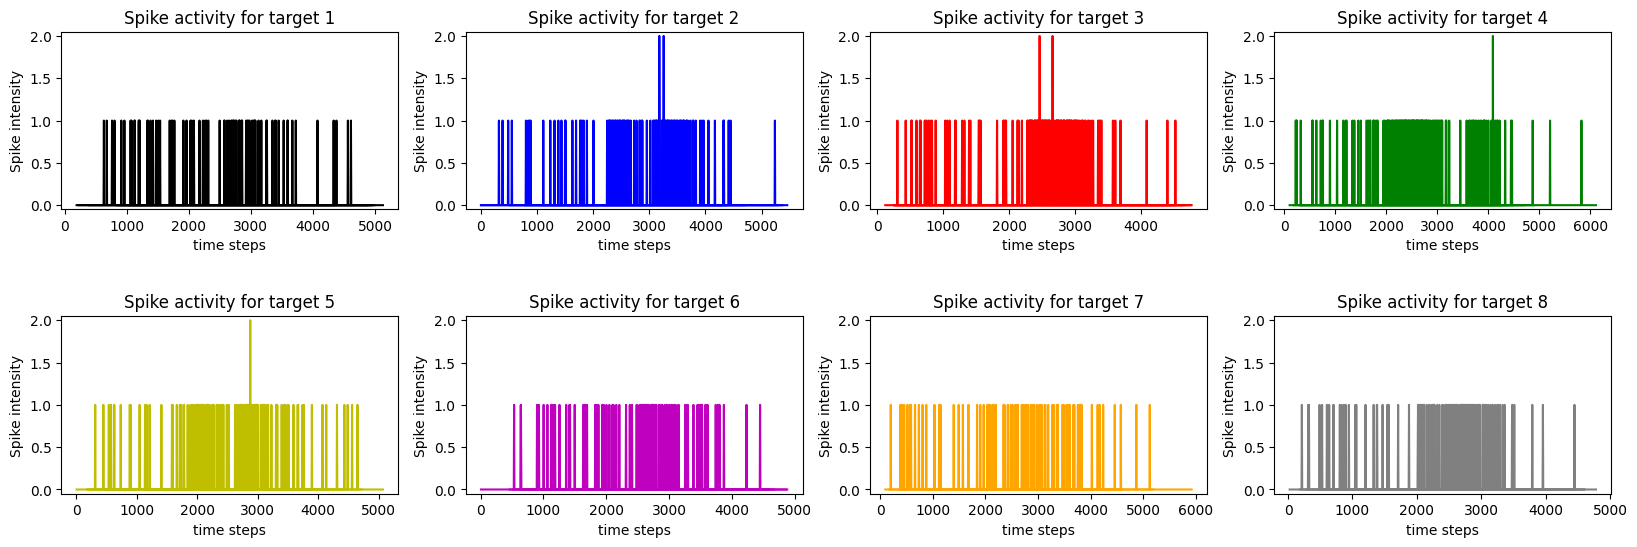

In [9]:
# Plotting neural spikes for each trial to the first target
frequency = 200 # Hz - frequency of acquisition
T = 1/frequency # s - period of acquisition

colors = ['k','b','r','g','y','m','orange','grey']

fig, axs = plt.subplots(2, 4, figsize=(20, 6))
for target_number in range(1,9) :
    for trial_number in range(1,7) :
        cells = dictNeurons['target'+str(target_number)]['trial'+str(trial_number)]['cells']
        # figure
        x_axis = dictNeurons['target'+str(target_number)]['trial'+str(trial_number)]['time']
        axs[(target_number-1)//4][(target_number-1)%4].plot(x_axis,cells,color=colors[target_number-1])
        axs[(target_number-1)//4][(target_number-1)%4].set_ylim([-0.05,2.05])
        axs[(target_number-1)//4][(target_number-1)%4].set_title('Spike activity for target '+str(target_number))
        axs[(target_number-1)//4][(target_number-1)%4].set_xlabel('time steps')
        axs[(target_number-1)//4][(target_number-1)%4].set_ylabel('Spike intensity')
plt.subplots_adjust(hspace=0.6)
plt.show()

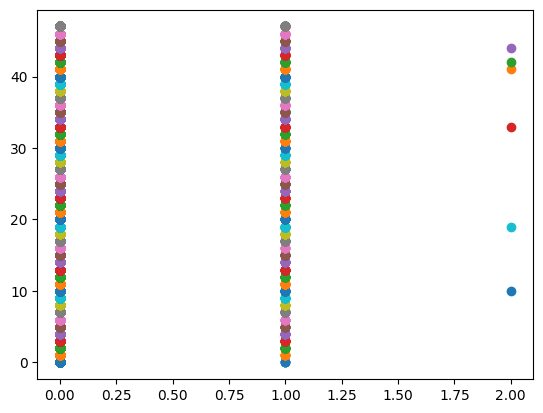

In [10]:
# Raster plot
fig = plt.subplots()
cells_all = []
for trial_number in range(1,7) :
    for target in range(1,9) :
        cells = np.array(dictNeurons['target'+str(target)]['trial'+str(trial_number)]['cells'])
        cells_all.append(cells)

for i in range(0,len(cells_all)) :   
    plt.scatter(cells_all[i],(i)*np.ones((1,len(cells_all[i]))))
    
        
plt.show()

starting time:  0.965  seconds
ending time:  21.69  seconds
duration:  20.725  seconds


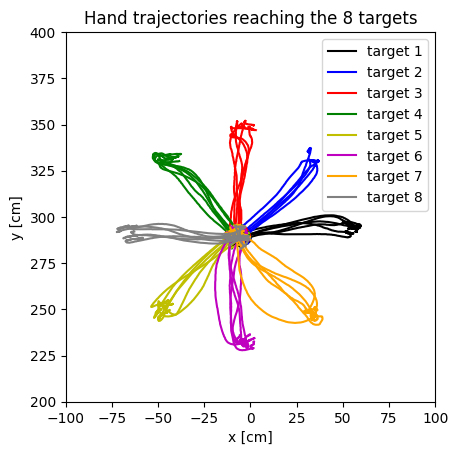

In [11]:
#%% To find the total duration for one movement: 
#print(len(dictNeurons['target1']['trial1']['time']))
start_time = dictNeurons['target1']['trial1']['time'][0]*T
print('starting time: ', float(start_time),' seconds')
end_time = dictNeurons['target1']['trial1']['time'][-1]*T
print('ending time: ', float(end_time),' seconds')
duration = end_time-start_time
print('duration: ',float(duration),' seconds')


#%% 

# Plot hand trajectiories for each target end every trial
fig, ax = plt.subplots()
colors = ['k','b','r','g','y','m','orange','grey']
for target in range(1,9) :
    for trial_number in range(1,7) :
        handxpos = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['handxpos']
        handypos = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['handypos']
        # figure
        if trial_number == 1 :
            plt.plot(handxpos,handypos,color=colors[target-1],label='target '+str(target))
        if trial_number != 1 :
            plt.plot(handxpos,handypos,color=colors[target-1])
        ax.set_aspect('equal', 'box')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.xlim([-100,100])
plt.ylim([200,400])
plt.legend()
plt.title('Hand trajectories reaching the 8 targets')
plt.show()

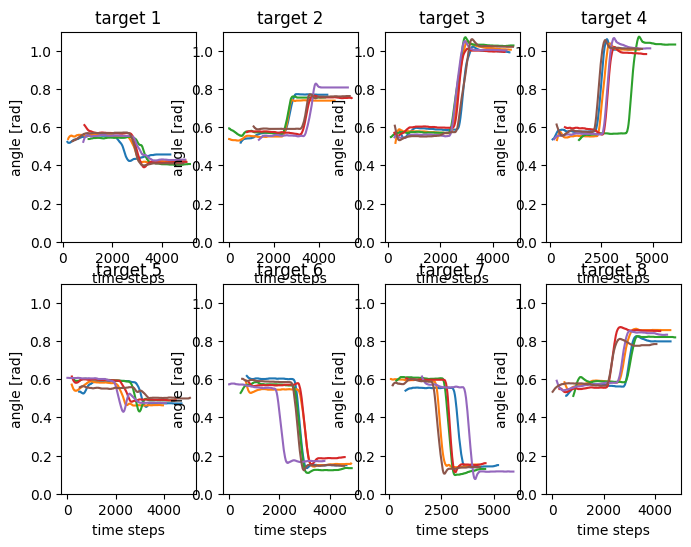

Text(0.5, 1.0, 'ZOOM - target 1 - shoulder angles')

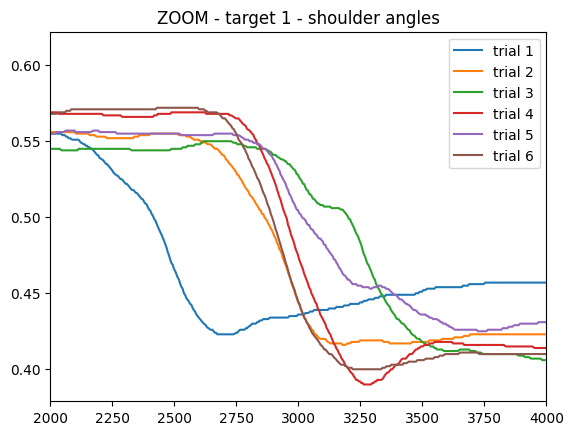

In [12]:
# Plot shoulder angles for every trial
fig, axs = plt.subplots(2,4,figsize=(8, 6))
count = -1
for target in range(1,9) :
    count += 1
    for trial_number in range(1,7) :
        shoulder_angle = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['shoang']
        time = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['time']
        # figure
        axs[count//4][count%4].plot(time,shoulder_angle)
        axs[count//4][count%4].set_xlabel('time steps')
        axs[count//4][count%4].set_ylabel('angle [rad]')
        axs[count//4][count%4].set_ylim([0,1.1])
    axs[count//4][count%4].set_title('target '+str(target))
plt.show()

fig = plt.subplots()
for trial_number in range(1,7) :
    shoulder_angle = dictNeurons['target1']['trial'+str(trial_number)]['shoang']
    time = dictNeurons['target1']['trial'+str(trial_number)]['time']
    # figure
    plt.plot(time,shoulder_angle,label='trial '+str(trial_number))
    plt.xlim([2000,4000])
plt.legend()
plt.title('ZOOM - target 1 - shoulder angles')

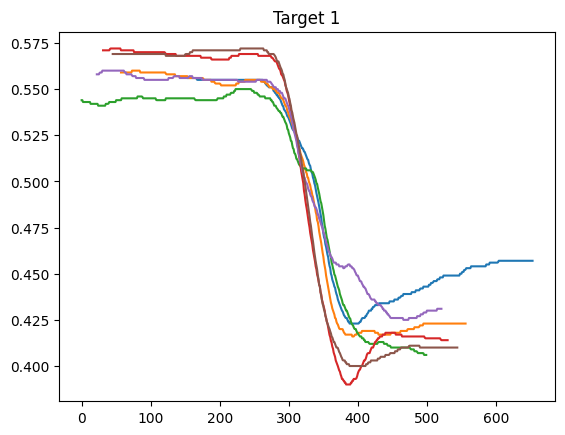

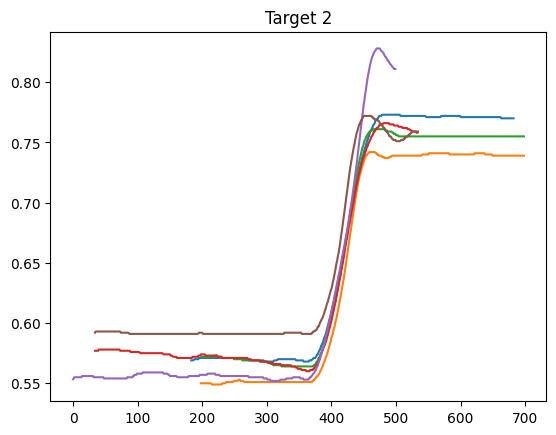

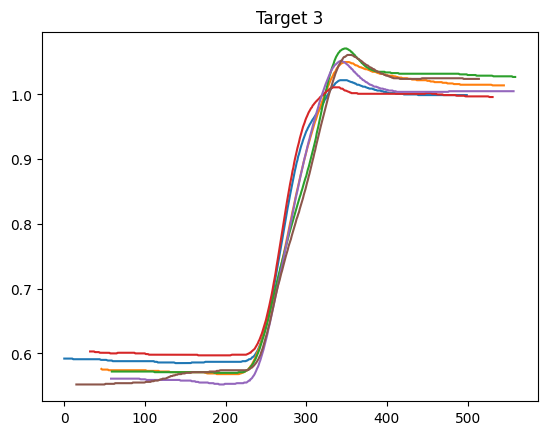

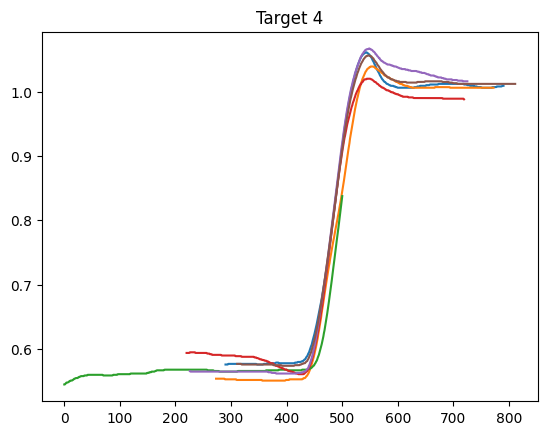

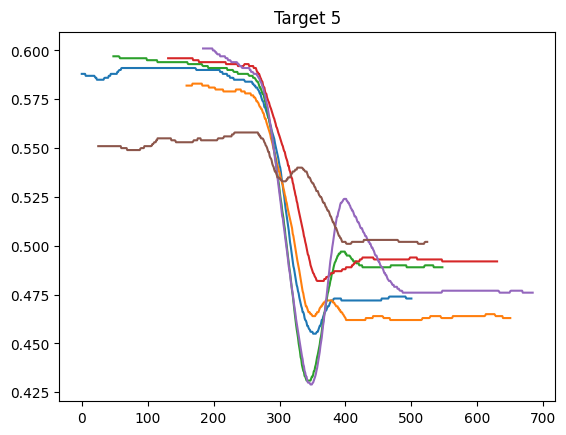

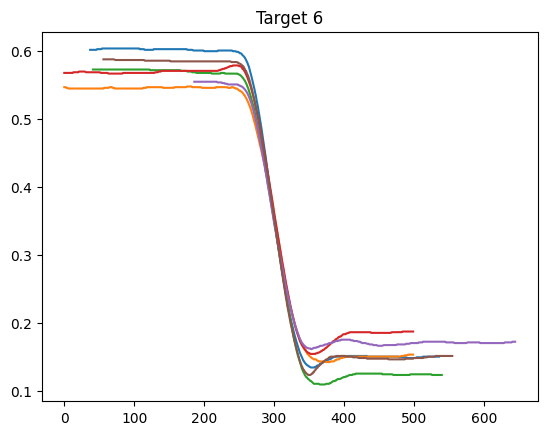

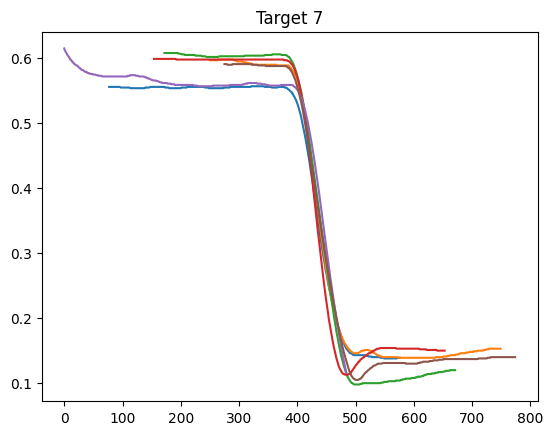

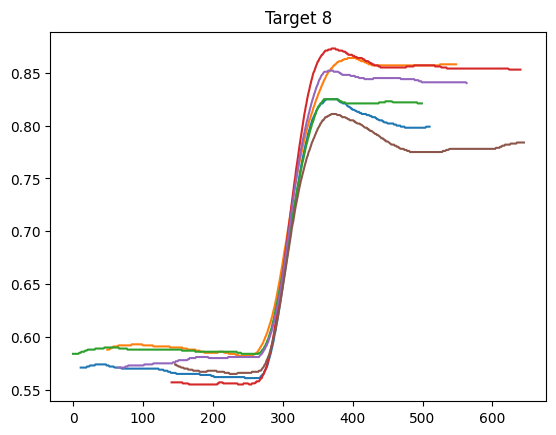

In [13]:
# Define the threshold for determining the drop/spike
threshold = 0.2

# Define the time range you want to capture for each target
desired_start_time = 1500  # Adjust as needed
desired_end_time = 4000    # Adjust as needed

number_of_targets = 8  # Assuming there are 8 targets

shifts_mat = np.zeros((8,6))

# Iterate through each target
for target_number in range(1, number_of_targets + 1):
    target_key = 'target' + str(target_number)
    reference_points = []  # Store the reference drop/spike points

    # Find the equivalent of "2000" and "4000" for each target
    for trial_number in range(1, 7):
        time = dictNeurons[target_key]['trial' + str(trial_number)]['time']
        ind1 = np.where(time >= desired_start_time)[0][0]
        ind2 = np.where(time <= desired_end_time)[0][-1]

        shoang = dictNeurons[target_key]['trial' + str(trial_number)]['shoang']
        shoang_processed = shoang[ind1:ind2 + 1]

        # Detecting trend (increase or decrease)
        mean_initial = np.mean(shoang_processed[:10])  # First 10 points
        mean_final = np.mean(shoang_processed[-10:])  # Last 10 points

        # Determine the drop or spike point for each curve
        if mean_final < mean_initial:  # Trend is decreasing
            shoang_range = np.max(shoang_processed) - np.min(shoang_processed)
            threshold_value = np.max(shoang_processed) - threshold * shoang_range
            reference_point = np.where(shoang_processed < threshold_value)[0][0]
        else:  # Trend is increasing
            shoang_range = np.max(shoang_processed) - np.min(shoang_processed)
            threshold_value = np.min(shoang_processed) + threshold * shoang_range
            reference_point = np.where(shoang_processed > threshold_value)[0][0]

        reference_points.append(reference_point)

    # Find the reference point for this target
    reference_point = max(reference_points)

    # Create a new figure for each target
    fig, ax = plt.subplots()
    ax.set_title(f'Target {target_number}')

    # Plot each trial for this target
    for trial_number in range(1, 7):
        shoang = dictNeurons[target_key]['trial' + str(trial_number)]['shoang']
        time = dictNeurons[target_key]['trial' + str(trial_number)]['time']

        ind1 = np.where(time >= desired_start_time)[0][0]
        ind2 = np.where(time <= desired_end_time)[0][-1]
        shoang_processed = shoang[ind1:ind2 + 1]

        # Calculate the shift for the time axis
        shift = reference_point - reference_points[trial_number - 1]
        
        shifts_mat[target_number-1,trial_number-1] = shift
        
        # Apply the shift
        time_shifted = np.arange(len(shoang_processed)) + shift

        # Plot
        ax.plot(time_shifted, shoang_processed)

    plt.show()


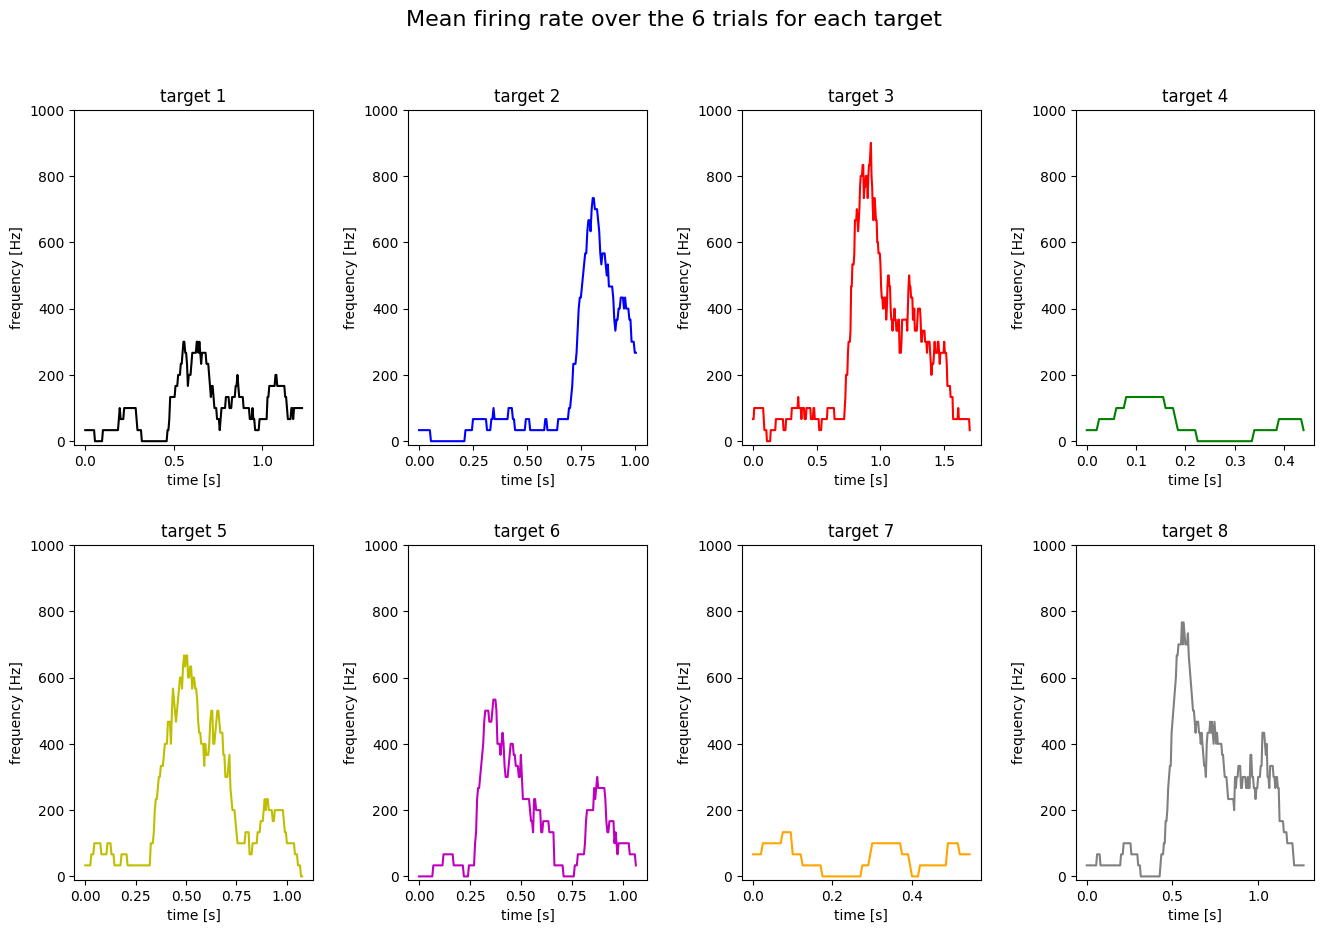

In [14]:
colors = ['k','b','r','g','y','m','orange','grey']

fig, axs = plt.subplots(2,4,figsize=(16, 10))
count = -1
mean_firing_rates = []
for target_number in range(1,9) :
    count += 1
    
    max_shift = np.max(shifts_mat[target_number-1,:])
    firing_rates = []
    min_len = np.inf  # Initialize min_len to positive infinity

    # Find the minimum length among all cells_processed arrays
    for trial_number in range(1, 7):
        cells = np.array(dictNeurons['target' + str(target_number)]['trial' + str(trial_number)]['cells'])
        time = dictNeurons['target' + str(target_number)]['trial' + str(trial_number)]['time']
        ind1 = np.where(time > 1500)[0][0]
        ind2 = np.where(time > 3500)[0][0]
        cells_processed = cells[ind1:ind2]
        tot_len = len(cells_processed)
        len_processed = tot_len - int(max_shift - shifts_mat[target_number-1,trial_number-1])

        # Update min_len if necessary
        if len_processed < min_len:
            min_len = len_processed

    # Trim all cells_processed arrays to have the same minimum length
    for trial_number in range(1, 7):
        cells = np.array(dictNeurons['target' + str(target_number)]['trial' + str(trial_number)]['cells'])
        time = dictNeurons['target' + str(target_number)]['trial' + str(trial_number)]['time']
        ind1 = np.where(time > 1500)[0][0]
        ind2 = np.where(time > 3500)[0][0]
        cells_processed = cells[ind1:ind2]
        tot_len = len(cells_processed)
        start_idx = int(max_shift - shifts_mat[target_number-1,trial_number-1])
        end_idx = int(start_idx + min_len)
        cells_processed = cells_processed[start_idx:end_idx]
        t_range = np.arange(0, len(cells_processed) * T, T)  # maximum time duration
        kernel = rect_kernel(t_range, 100e-3)  # RECT->100e-3 (width = 0.1 [s] = 20 time steps), GAUSS->0.005
        f_rate = firing_rate(cells_processed[:,0], kernel)
        firing_rates.append(f_rate)
        #print(len(f_rate))

    firing_rates = np.array(firing_rates).reshape(6,len(f_rate))

    # Plot the averaged firing rate
    mean_firing_rates.append(np.mean(firing_rates, 0))
    x_axis = np.arange(0,min_len*T,T)
    axs[count//4][count%4].plot(x_axis,mean_firing_rates[target_number-1],color=colors[target_number-1],label='target '+str(target_number))
    axs[count//4][count%4].set_xlabel('time [s]')
    axs[count//4][count%4].set_ylabel('frequency [Hz]')
    axs[count//4][count%4].set_ylim([-10,1000])
    axs[count//4][count%4].set_title('target '+str(target_number))
fig.suptitle('Mean firing rate over the 6 trials for each target', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.4)


In [15]:
# Alignment of hand trajectories
x = []
y = []
for target_number in range(1,9) :    
    max_shift = np.max(shifts_mat[target_number-1,:])
    min_len = np.inf  # Initialize min_len to positive infinity

    # Find the minimum length among all cells_processed arrays
    for trial_number in range(1, 7):
        handxpos = np.array(dictNeurons['target' + str(target_number)]['trial' + str(trial_number)]['handxpos'])
        time = dictNeurons['target' + str(target_number)]['trial' + str(trial_number)]['time']
        if time[-1] > 4500 :
            ind1 = np.where(time > 1500)[0][0]
            ind2 = np.where(time > 4500)[0][0]
        else : 
            ind1 = np.where(time > 1500)[0][0]
            ind2 = len(time)-1
        handxpos_processed = handxpos[ind1:ind2]
        tot_len = len(handxpos_processed)
        len_processed = tot_len - int(max_shift - shifts_mat[target_number-1,trial_number-1])

        # Update min_len if necessary
        if len_processed < min_len:
            min_len = len_processed

    # Trim all cells_processed arrays to have the same minimum length
    x_one_target = []
    y_one_target = []
    for trial_number in range(1, 7):
        handxpos = np.array(dictNeurons['target' + str(target_number)]['trial' + str(trial_number)]['handxpos'])
        handypos = np.array(dictNeurons['target' + str(target_number)]['trial' + str(trial_number)]['handypos'])
        time = dictNeurons['target' + str(target_number)]['trial' + str(trial_number)]['time']
        if time[-1] > 4500 :
            ind1 = np.where(time > 1500)[0][0]
            ind2 = np.where(time > 4500)[0][0]
        else : 
            ind1 = np.where(time > 1500)[0][0]
            ind2 = len(time)-1
        handxpos_processed = handxpos[ind1:ind2]
        handypos_processed = handypos[ind1:ind2]
        tot_len = len(handxpos_processed)
        start_idx = int(max_shift - shifts_mat[target_number-1,trial_number-1])
        end_idx = int(start_idx + min_len)
        handxpos_processed = handxpos_processed[start_idx:end_idx]
        handypos_processed = handypos_processed[start_idx:end_idx]
        x_one_target.append(handxpos_processed)
        y_one_target.append(handypos_processed)

    x.append(x_one_target)
    y.append(y_one_target)


Text(0.5, 1.0, 'Hand trajectories and firing rates for the 8 targets')

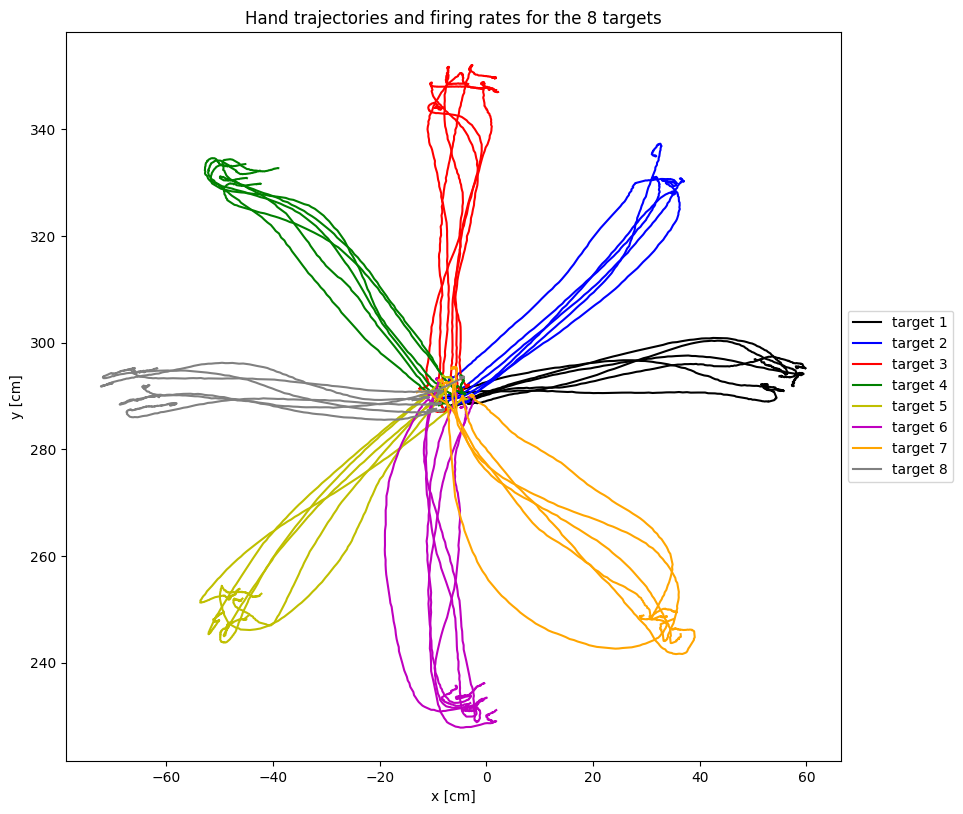

In [16]:
# Plot hand trajectiories for each target end every trial
fig, ax = plt.subplots(figsize=(10,10))
colors = ['k','b','r','g','y','m','orange','grey']
for target_number in range(1,9) :
    for trial_number in range(1,7) :
        # figure
        if trial_number == 1 :
            plt.plot(x[target_number-1][trial_number-1],y[target_number-1][trial_number-1],color=colors[target_number-1],label='target '+str(target_number))
        if trial_number != 1 :
            plt.plot(x[target_number-1][trial_number-1],y[target_number-1][trial_number-1],color=colors[target_number-1])
        ax.set_aspect('equal', 'box')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
#plt.xlim([-100,100])
#plt.ylim([200,400])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.title('Hand trajectories and firing rates for the 8 targets')

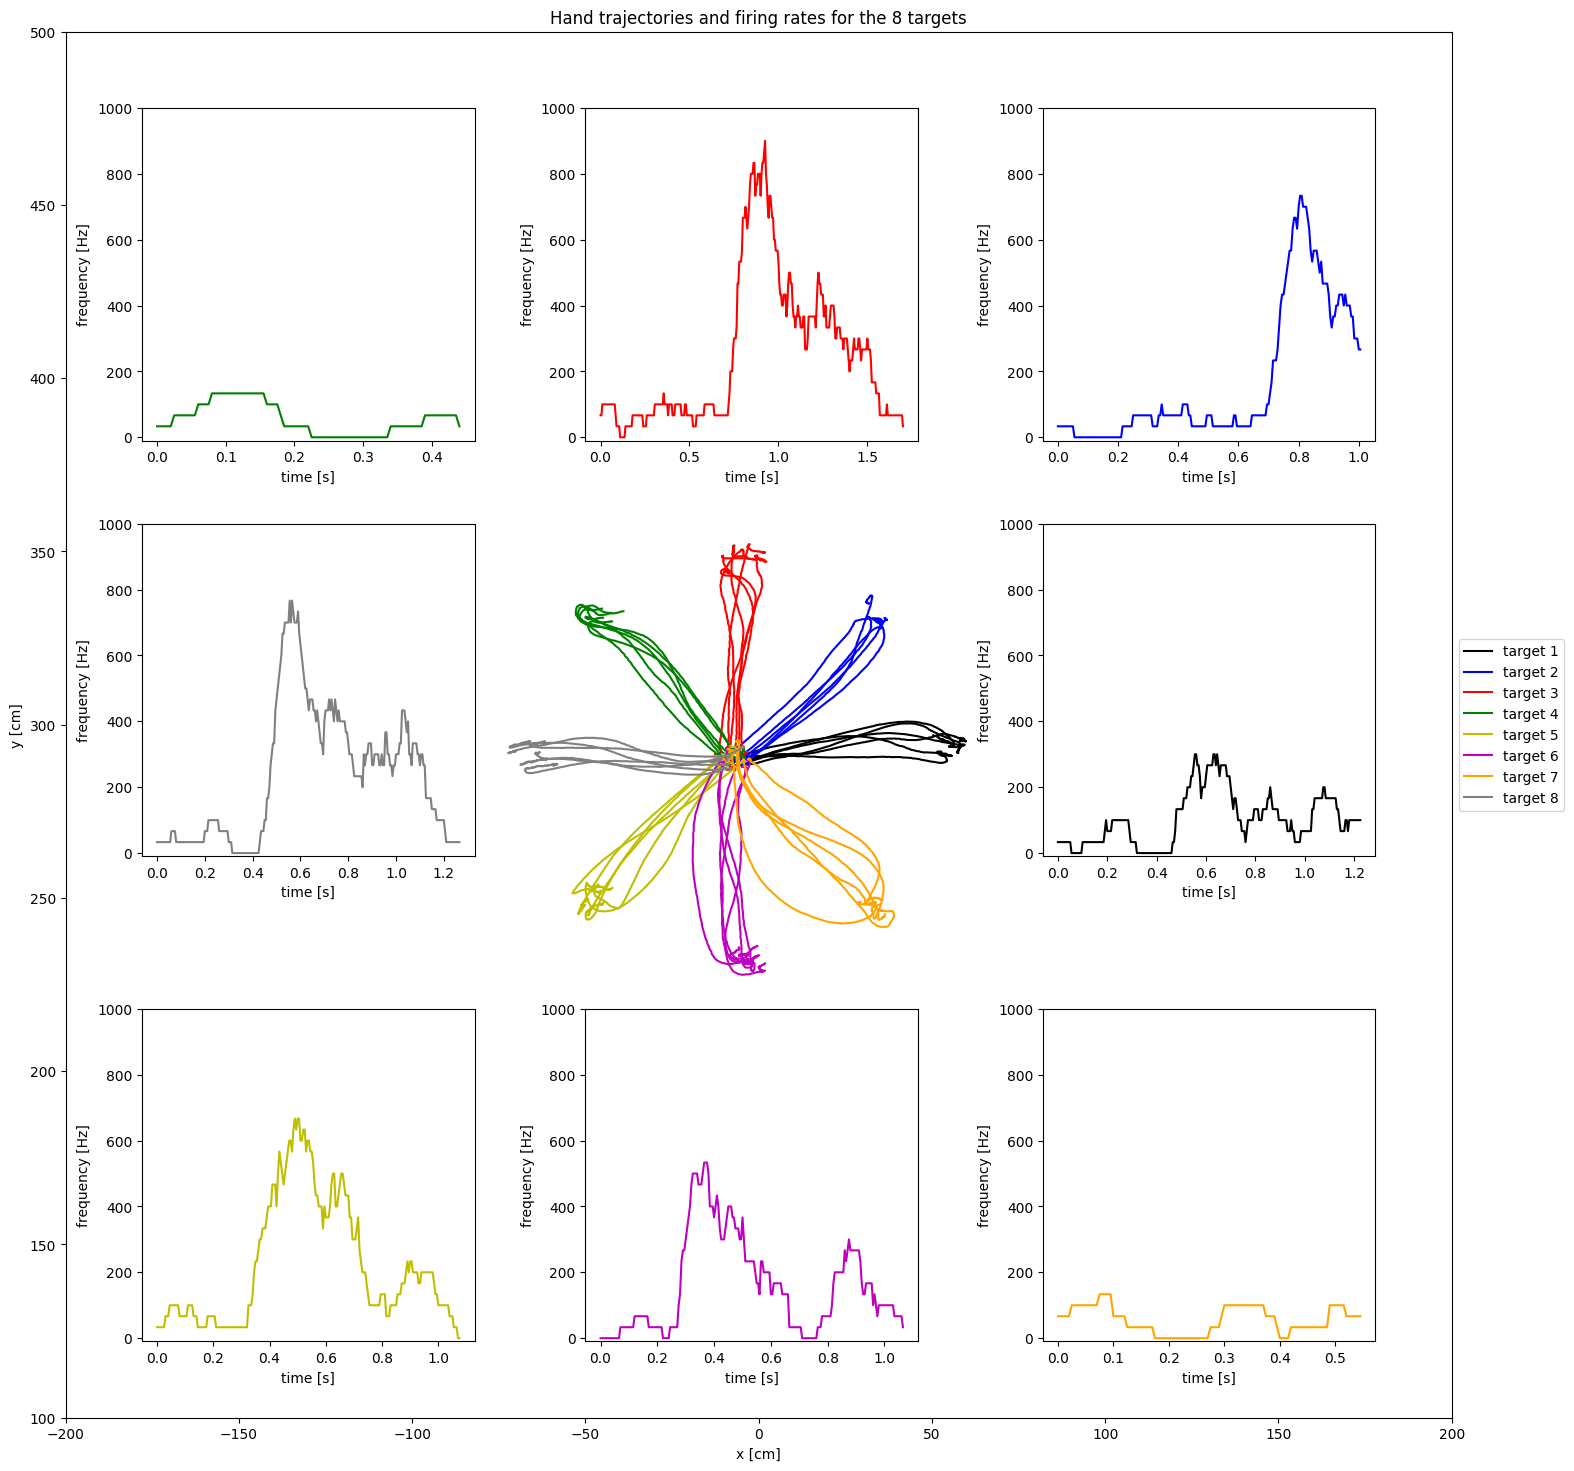

In [17]:
# Plot hand trajectiories for each target end every trial
fig, ax = plt.subplots(figsize=(18,18))
colors = ['k','b','r','g','y','m','orange','grey']
for target_number in range(1,9) :
    for trial_number in range(1,7) :
        # figure
        if trial_number == 1 :
            plt.plot(x[target_number-1][trial_number-1],y[target_number-1][trial_number-1],color=colors[target_number-1],label='target '+str(target_number))
        if trial_number != 1 :
            plt.plot(x[target_number-1][trial_number-1],y[target_number-1][trial_number-1],color=colors[target_number-1])
        ax.set_aspect('equal', 'box')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.xlim([-200,200])
plt.ylim([100,500])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.title('Hand trajectories and firing rates for the 8 targets')

axins1 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(.7, .4, .8, .8), bbox_transform=ax.transAxes, loc=3)
x_axis = np.arange(0, len(mean_firing_rates[0])*T,T)
axins1.plot(x_axis, mean_firing_rates[0], color=colors[0])
axins1.set_xlabel('time [s]')
axins1.set_ylabel('frequency [Hz]')
axins1.set_ylim(-10, 1000)
#axins1.set_xlim(-10,450)

axins2 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(.7, .7, .8, .8), bbox_transform=ax.transAxes, loc=3)
x_axis = np.arange(0, len(mean_firing_rates[1])*T,T)
axins2.plot(x_axis, mean_firing_rates[1], color=colors[1])
axins2.set_xlabel('time [s]')
axins2.set_ylabel('frequency [Hz]')
axins2.set_ylim(-10,1000)
#axins2.set_xlim(-10,450)

axins3 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(.37, .7, .8, .8), bbox_transform=ax.transAxes, loc=3)
x_axis = np.arange(0, len(mean_firing_rates[2])*T,T)
axins3.plot(x_axis, mean_firing_rates[2], color=colors[2])
axins3.set_xlabel('time [s]')
axins3.set_ylabel('frequency [Hz]')
axins3.set_ylim(-10,1000)
#axins3.set_xlim(-10,450)

axins4 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(.05, .7, .8, .8), bbox_transform=ax.transAxes, loc=3)
x_axis = np.arange(0, len(mean_firing_rates[3])*T,T)
axins4.plot(x_axis, mean_firing_rates[3], color=colors[3])
axins4.set_xlabel('time [s]')
axins4.set_ylabel('frequency [Hz]')
axins4.set_ylim(-10,1000)
#axins4.set_xlim(-10,450)

axins5 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(.05, .05, .8, .8), bbox_transform=ax.transAxes, loc=3)
x_axis = np.arange(0, len(mean_firing_rates[4])*T,T)
axins5.plot(x_axis, mean_firing_rates[4], color=colors[4])
axins5.set_xlabel('time [s]')
axins5.set_ylabel('frequency [Hz]')
axins5.set_ylim(-10,1000)
#axins5.set_xlim(-10,450)

axins6 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(.37, .05, .8, .8), bbox_transform=ax.transAxes, loc=3)
x_axis = np.arange(0, len(mean_firing_rates[5])*T,T)
axins6.plot(x_axis, mean_firing_rates[5], color=colors[5])
axins6.set_xlabel('time [s]')
axins6.set_ylabel('frequency [Hz]')
axins6.set_ylim(-10,1000)
#axins6.set_xlim(-10,450)

axins7 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(.7, .05, .8, .8), bbox_transform=ax.transAxes, loc=3)
x_axis = np.arange(0, len(mean_firing_rates[6])*T,T)
axins7.plot(x_axis, mean_firing_rates[6], color=colors[6])
axins7.set_xlabel('time [s]')
axins7.set_ylabel('frequency [Hz]')
axins7.set_ylim(-10,1000)
#axins7.set_xlim(-10,450)

axins8 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(.05, .4, .8, .8), bbox_transform=ax.transAxes, loc=3)
x_axis = np.arange(0, len(mean_firing_rates[7])*T,T)
axins8.plot(x_axis, mean_firing_rates[7], color=colors[7])
axins8.set_xlabel('time [s]')
axins8.set_ylabel('frequency [Hz]')
axins8.set_ylim(-10,1000)
#axins8.set_xlim(-10,450)

plt.show()

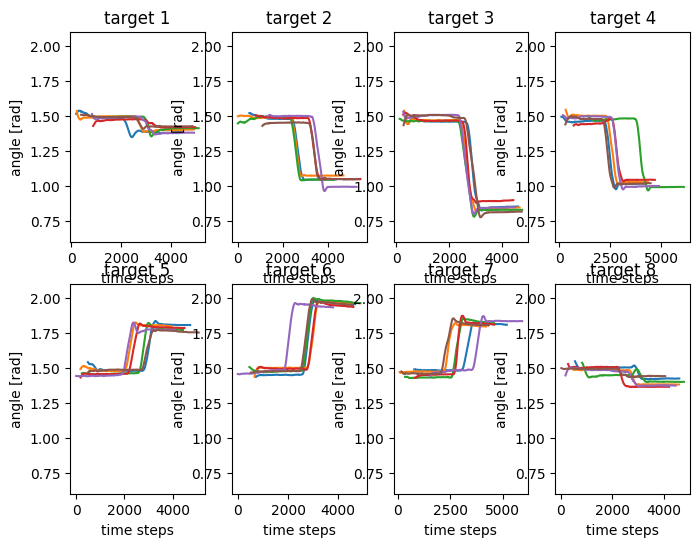

In [18]:
# Plot elbow angles for every trial
fig, axs = plt.subplots(2,4,figsize=(8, 6))
count = -1
for target in range(1,9) :
    count += 1
    for trial_number in range(1,7) :
        elbow_angle = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['elbang']
        time = dictNeurons['target'+str(target)]['trial'+str(trial_number)]['time']
        # figure
        axs[count//4][count%4].plot(time,elbow_angle)
        axs[count//4][count%4].set_xlabel('time steps')
        axs[count//4][count%4].set_ylabel('angle [rad]')
        axs[count//4][count%4].set_ylim([0.6,2.1])
    axs[count//4][count%4].set_title('target '+str(target))
plt.show()



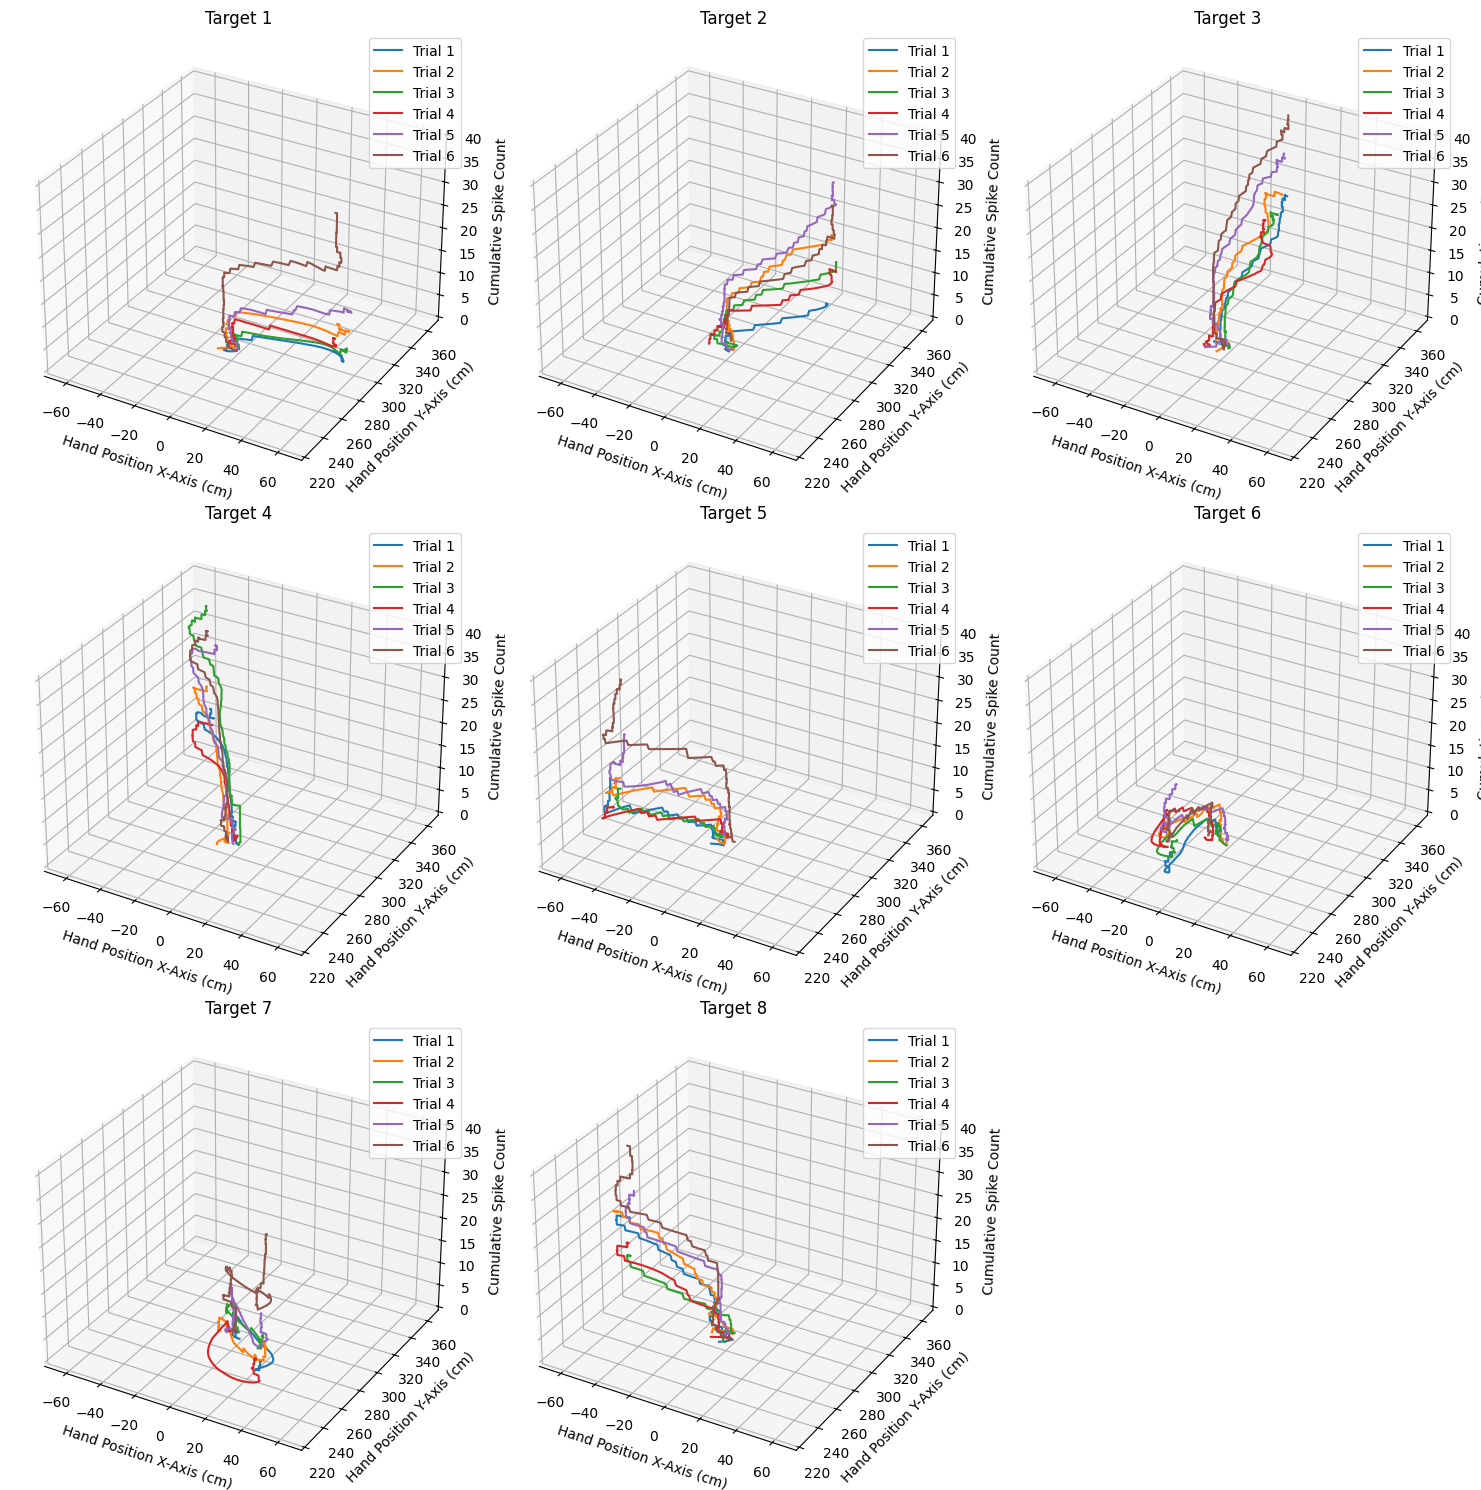

In [19]:

# Assuming dictNeurons is your dictionary
# dictNeurons = {}  # Replace this with your actual dictionary

fig = plt.figure(figsize=(15, 15))

# Loop through each target
for i in range(1, 9):
    ax = fig.add_subplot(3, 3, i, projection='3d')
    ax.set_title(f"Target {i}")

    # Loop through each trial for the target
    for j in range(1, 7):
        # data = dictNeurons['target' + str(i)]['trial' + str(j)]
        shoang = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['shoang'])
        handxpos = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['handxpos'])
        elbang = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['elbang'])
        handypos = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['handypos'])
        cells = np.array(dictNeurons['target' + str(i)]['trial' + str(j)]['cells'])

        # Assuming cells is a list of lists of 0s and 1s, one list per timestep
        spike_counts = np.cumsum([np.sum(timestep) for timestep in cells])
        spike_counts = np.reshape(spike_counts, (len(spike_counts), 1))
        # print(spike_counts)# Check if lengths of shoang, elbang, and spike_counts are the same
        # print(shoang.shape, elbang.shape, spike_counts.shape)
        if len(shoang) == len(elbang) == len(spike_counts):
            ax.plot(handxpos, handypos, spike_counts, label=f'Trial {j}')
        else:
            print(f"Length mismatch in Target {i} Trial {j}")

    ax.legend()
    ax.set_zlim(0, 40)
    ax.set_ylim(220,370)
    ax.set_xlim(-70,70)
    # ax.set_ylim(200, 360)
    ax.set_xlabel('Hand Position X-Axis (cm)')
    ax.set_ylabel('Hand Position Y-Axis (cm)')
    ax.set_zlabel('Cumulative Spike Count')

plt.tight_layout()
plt.show()


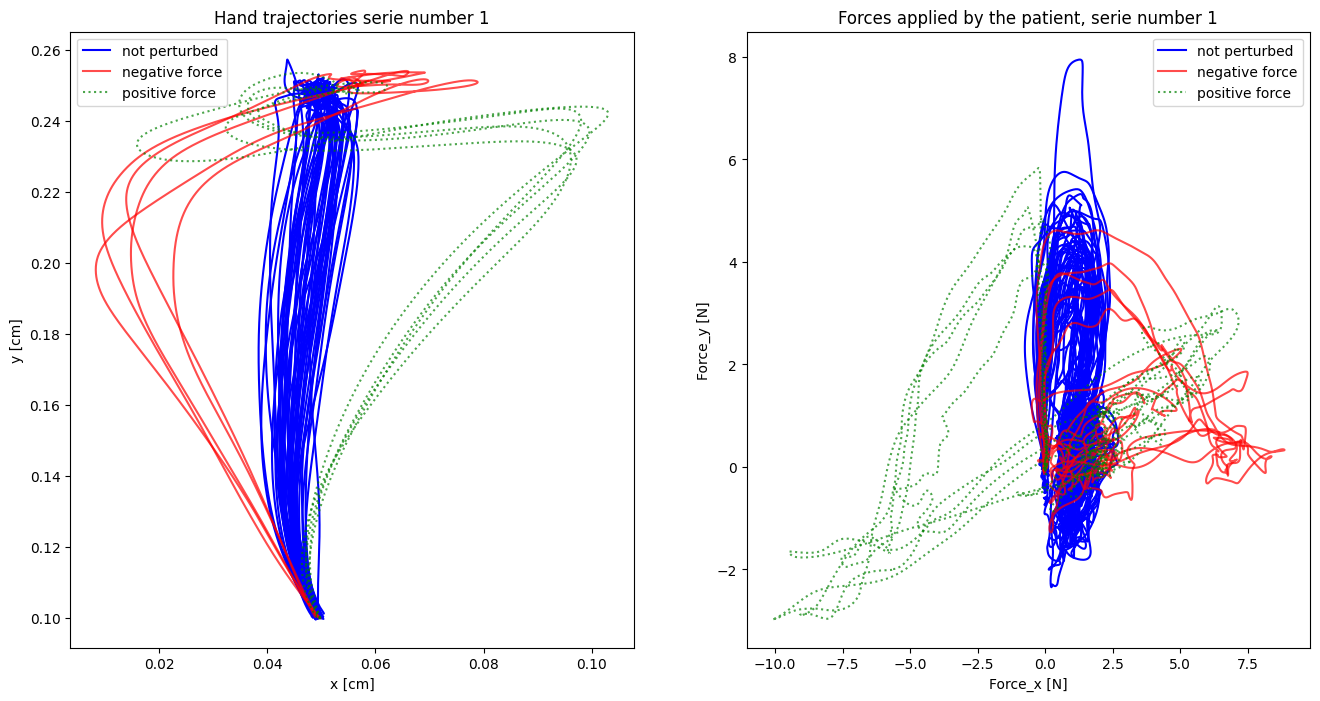

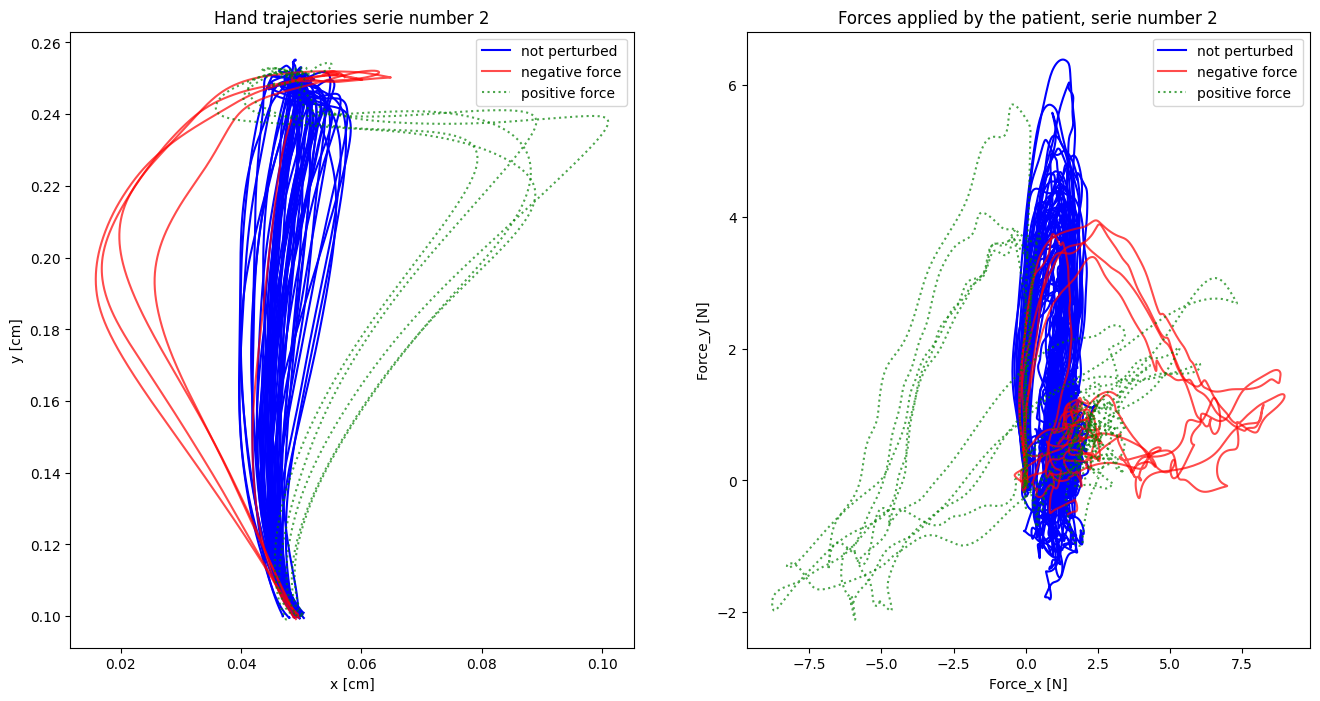

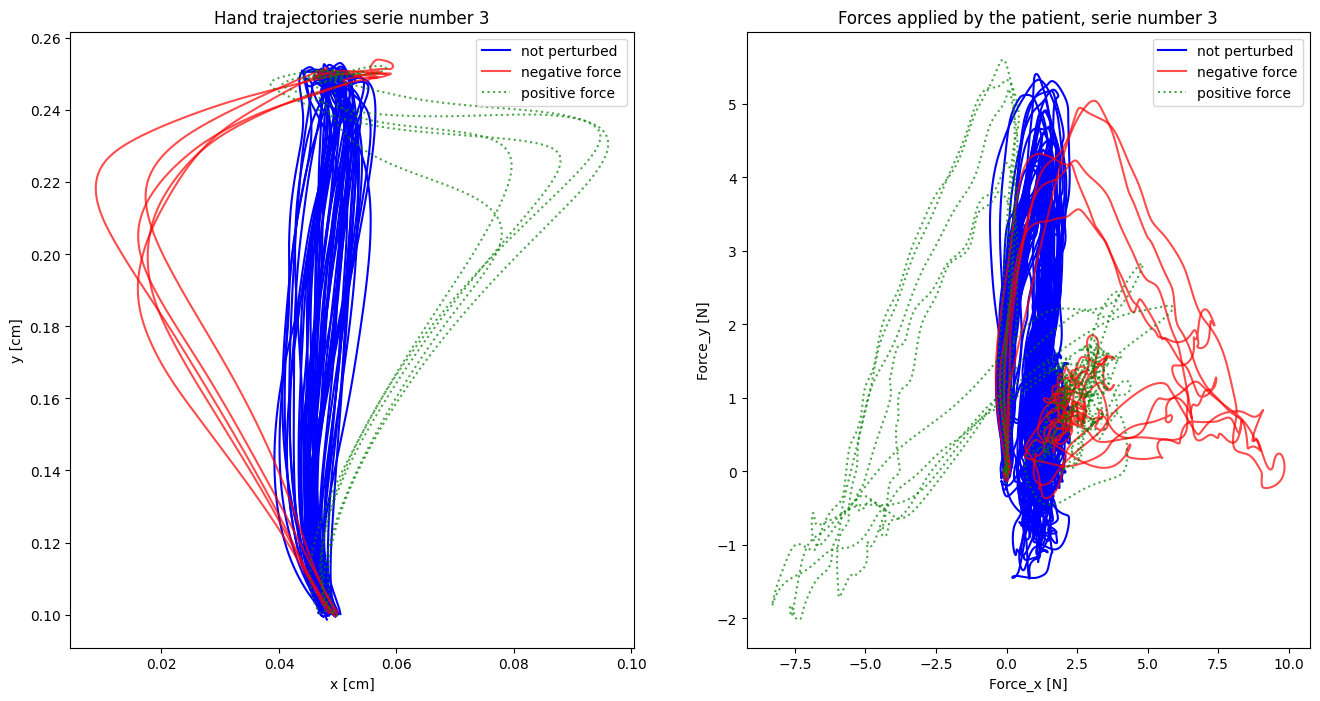

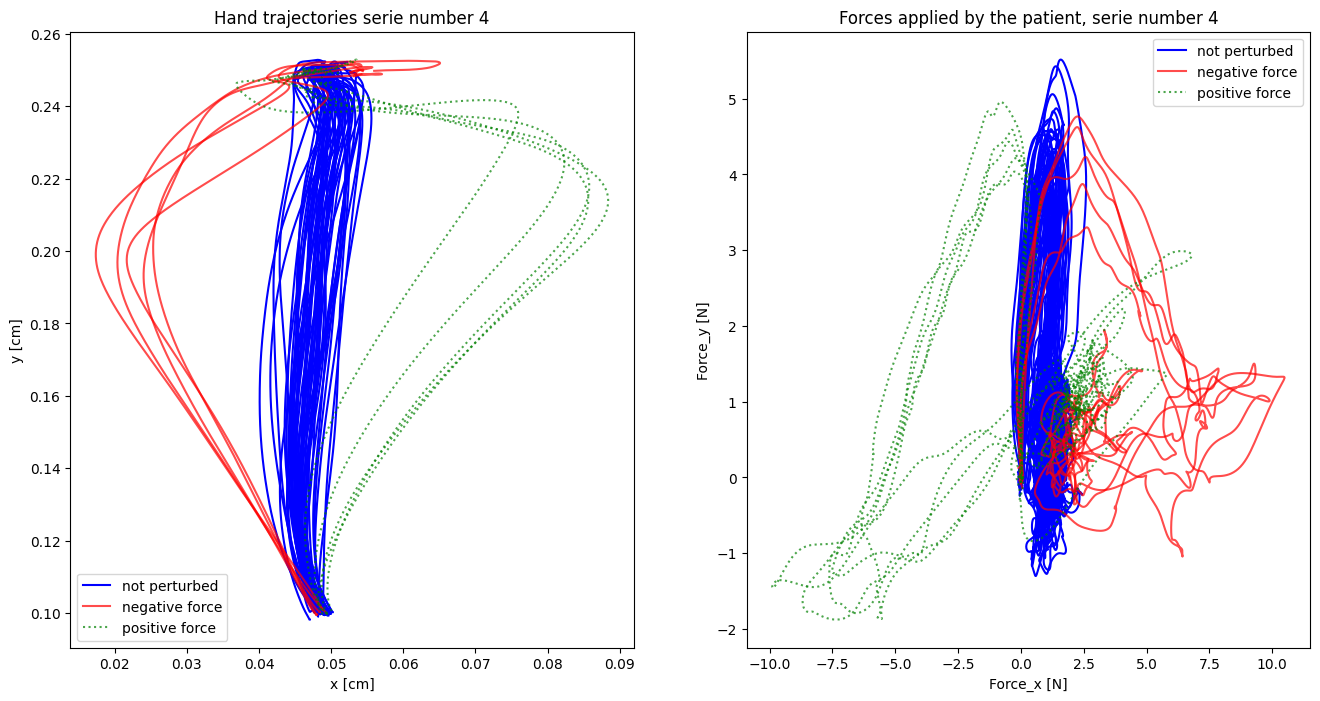

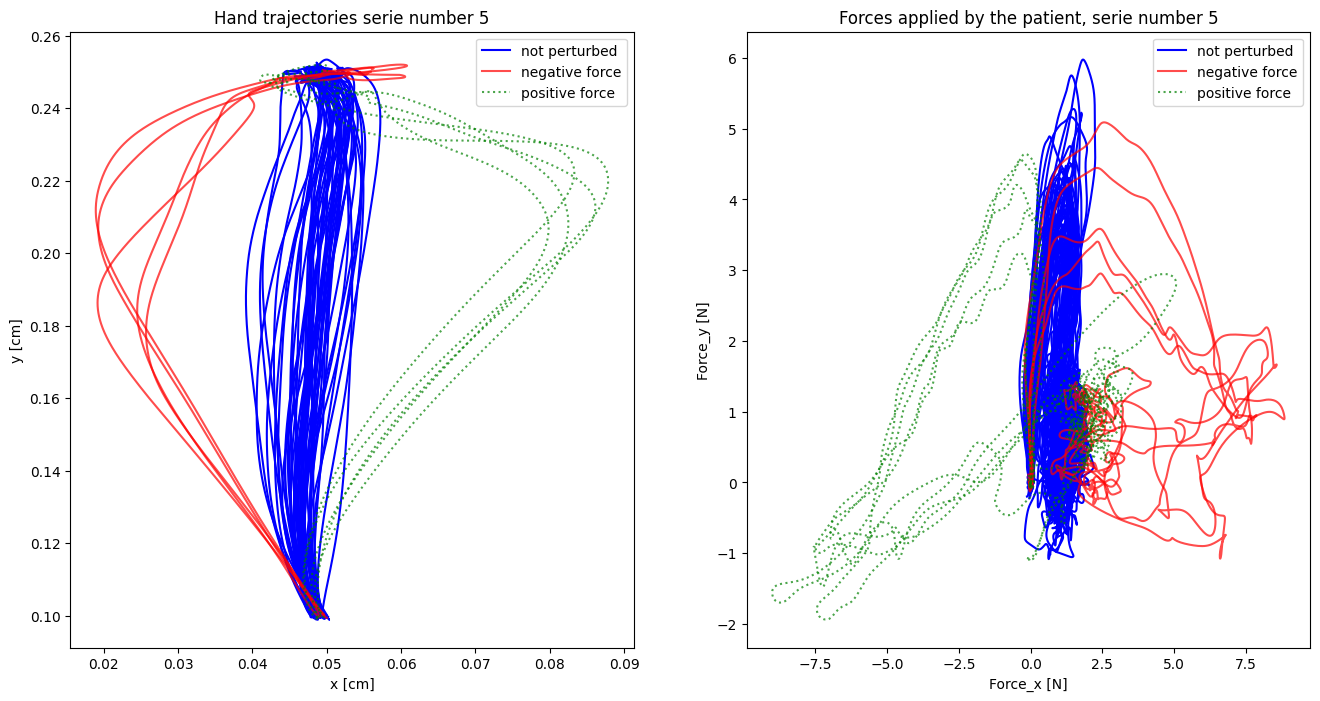

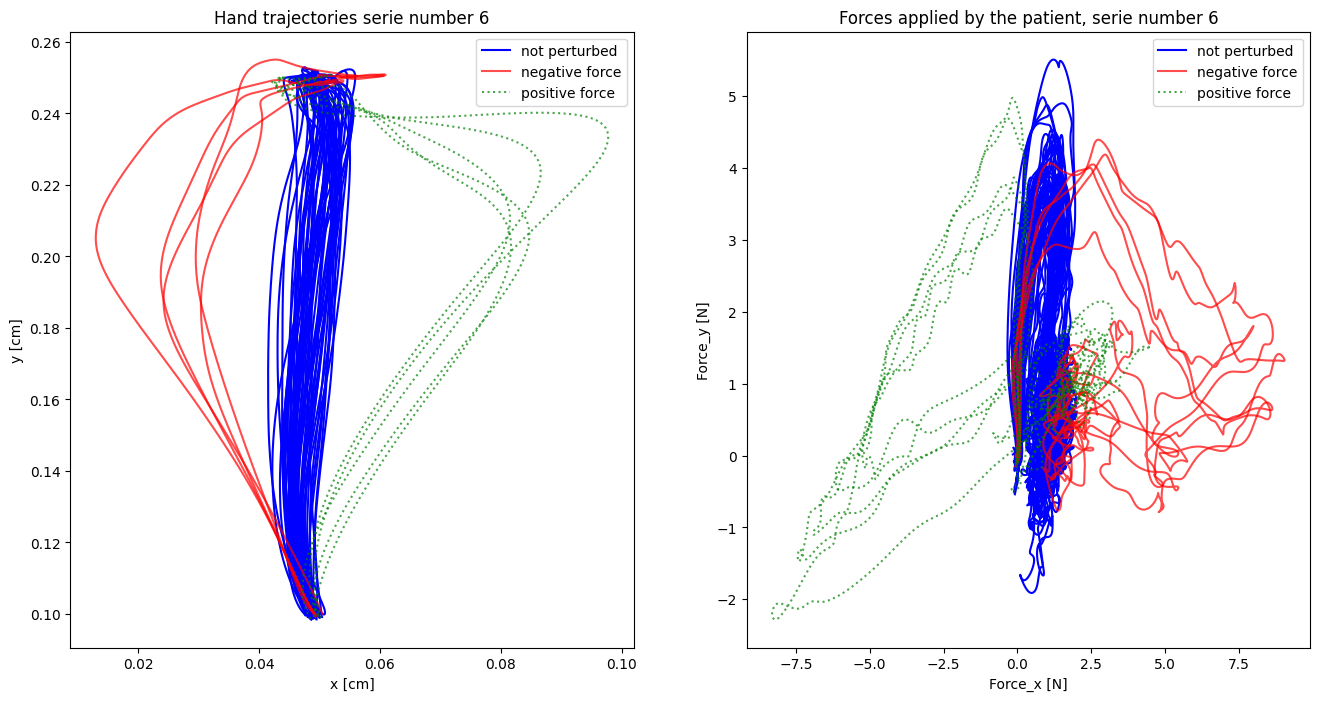

In [20]:
# Plot x and y coordinates from the dictMuscles with the forces applied by the patient:

# WE DON'T NEED TO SEPARATE THE SERIES BUT COULD BE BETTER FOR THE PLOT TO SHOW JUST ONE

x = dictMuscles['HandX']
y = dictMuscles['HandY']

force_x = dictMuscles['HandXForce']
force_y = dictMuscles['HandYForce']

descriptions = dictMuscles['descriptions']
extracted = dictMuscles['extracted']

for n_serie in range(0,len(x),60) :
    fig, axs = plt.subplots(1, 2, figsize=(16,8))
    count1 = 0
    count2 = 0
    count3 = 0
    for i in range(0,60) :
        if dictMuscles['extracted'][i+n_serie,2] == 1 :
            if count1 == 0 :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='b', label='not perturbed')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='b', label='not perturbed')
                count1 = 1
            else :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='b')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='b')
        if dictMuscles['extracted'][i+n_serie,2] == 2 :
            if count2 == 0 :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='r', alpha=0.7, label='negative force')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='r', alpha=0.7, label='negative force')
                count2 = 1
            else :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='r', alpha=0.7)
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='r', alpha=0.7)
        if dictMuscles['extracted'][i+n_serie,2] == 3 :
            if count3 == 0 :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='g', alpha=0.7, linestyle='dotted', label='positive force')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='g', alpha=0.7, linestyle='dotted', label='positive force')
                count3 = 1
            else :
                axs[0].plot(x[i+n_serie,:], y[i+n_serie,:], color='g', alpha=0.7, linestyle='dotted')
                axs[1].plot(force_x[i+n_serie,:], force_y[i+n_serie,:], color='g', alpha=0.7, linestyle='dotted')

    axs[0].set_xlabel('x [cm]')
    axs[0].set_ylabel('y [cm]')
    axs[0].set_title('Hand trajectories serie number '+str(int(n_serie/60+1)))
    axs[0].legend()
    
    axs[1].set_xlabel('Force_x [N]')
    axs[1].set_ylabel('Force_y [N]')
    axs[1].set_title('Forces applied by the patient, serie number '+str(int(n_serie/60+1)))
    axs[1].legend()
    
    plt.show()

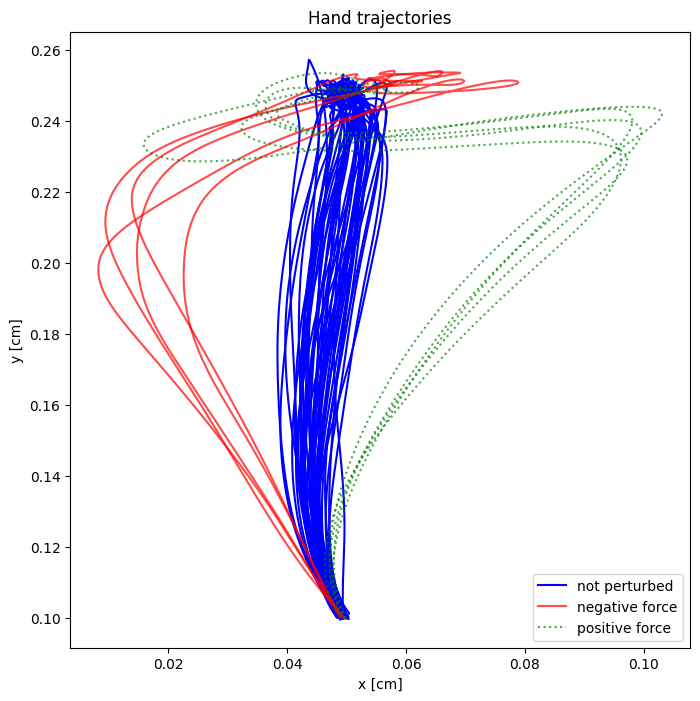

In [21]:
# Prettier plot
x = dictMuscles['HandX']
y = dictMuscles['HandY']

extracted = dictMuscles['extracted']

fig, axs = plt.subplots(figsize=(8,8))

count_np = 0
count_nf = 0
count_pf = 0
for i in range(0,60) :
    if dictMuscles['extracted'][i,2] == 1 :
        if count_np == 0 :
            plt.plot(x[i,:], y[i,:], color='b', label='not perturbed')
            count_np = 1
        else :
            plt.plot(x[i,:], y[i,:], color='b')
    if dictMuscles['extracted'][i,2] == 2 :
        if count_nf == 0 :
            plt.plot(x[i,:], y[i,:], color='r', alpha=0.7, label='negative force')
            count_nf = 1
        else :
            plt.plot(x[i,:], y[i,:], color='r', alpha=0.7)
    if dictMuscles['extracted'][i,2] == 3 :
        if count_pf == 0 :
            plt.plot(x[i,:], y[i,:], color='g', alpha=0.7, linestyle='dotted', label='positive force')
            count_pf = 1
        else :
            plt.plot(x[i,:], y[i,:], color='g', alpha=0.7, linestyle='dotted')

plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Hand trajectories')
plt.legend(loc='lower right')
    
   

In [22]:
# Align the data with a velocity threshold of 3 cm/s
vel_x = dictMuscles['HandXVel']
vel_y = dictMuscles['HandYVel']

threshold = 0.03 # m/s

active_segments_x = np.zeros((len(vel_x), 2))
active_segments_y = np.zeros((len(vel_y), 2))

for row in range(len(vel_x)):
    ind_activ_x = np.where(vel_x[row] > threshold)[0]
    ind_activ_y = np.where(vel_y[row] > threshold)[0]

    active_x = np.split(ind_activ_x, np.where(np.diff(ind_activ_x) != 1)[0] + 1)
    active_y = np.split(ind_activ_y, np.where(np.diff(ind_activ_y) != 1)[0] + 1)

    for segment_x in active_x:
        if len(segment_x) >= 200:
            start_x = segment_x[0]
            active_segments_x[row, 0] = int(start_x)

    for segment_y in active_y:
        if len(segment_y) >= 200:
            start_y = segment_y[0]
            active_segments_y[row, 0] = int(start_y)

for row in range(len(vel_x)):
    ind_not_activ_x = np.where(vel_x[row] <= threshold)[0]
    ind_not_activ_y = np.where(vel_y[row] <= threshold)[0]

    not_active_x = np.split(ind_not_activ_x, np.where(np.diff(ind_not_activ_x) != 1)[0] + 1)
    not_active_y = np.split(ind_not_activ_y, np.where(np.diff(ind_not_activ_y) != 1)[0] + 1)

    for segment_x in not_active_x :
        if len(segment_x) >= 200:
            end_x = segment_x[0]
            active_segments_x[row, 1] = int(end_x)

    for segment_y in not_active_y:
        if len(segment_y) >= 200:
            end_y = segment_y[0]
            active_segments_y[row, 1] = int(end_y)



In [55]:
# Use y to cut EMG data BECAUSE YESS
# find shortest sequence
# first substitute where last value is still 0
for i in range(0, len(active_segments_y)) :
    if active_segments_y[i,1] == 0 :
        active_segments_y[i,1] = len(vel_y[0]) # it goes up to the last value

lengths = []
for i in range(0, len(active_segments_y)) :
    lengths.append(int(active_segments_y[i,1]-active_segments_y[i,0]))

min_len = np.min(lengths)+200


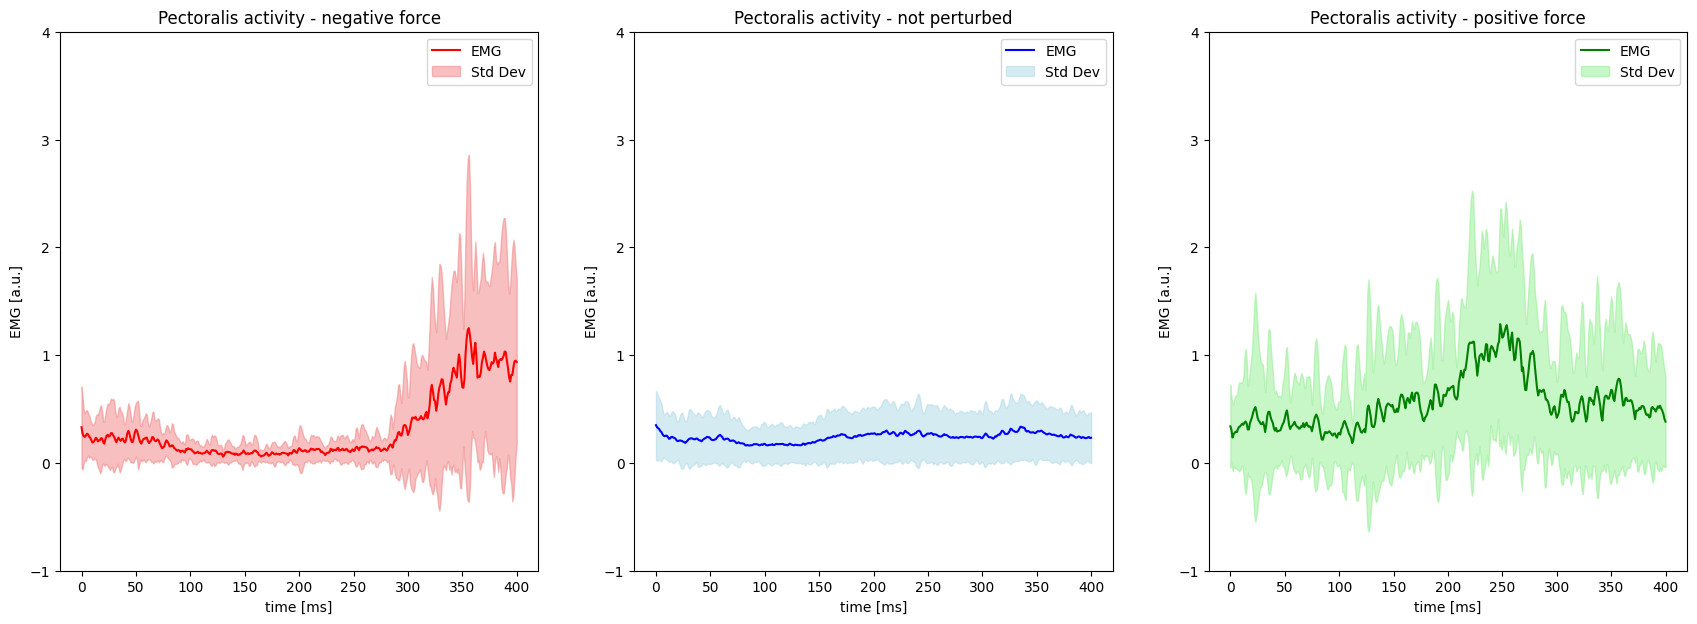

In [56]:
# Plot EMG with vert line for reaction time
extracted = dictMuscles['extracted']
pectoralis = dictMuscles['Pectoralis']

fig, axs = plt.subplots(1, 3, figsize=(21,7))

pectoralis_np = []
pectoralis_nf = []
pectoralis_pf = []

rt_np = []
rt_nf = []
rt_pf = []

# Divide the EMG based on the condition (force or not) 
# Cut them with the y velocity (because the force depends on y_dot, and from the force depends the EMG)

for i in range(0,len(pectoralis)) :
    if extracted[i,2] == 1 : # not perturbed
        pectoralis_np.append(pectoralis[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])
        rt_np.append(extracted[i,-1]-active_segments_y[i,0])

    if extracted[i,2] == 2 : # negative force
        pectoralis_nf.append(pectoralis[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   
        rt_nf.append(extracted[i,-1]-active_segments_y[i,0])
        
    if extracted[i,2] == 3 : # positive force
        pectoralis_pf.append(pectoralis[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   
        rt_pf.append(extracted[i,-1]-active_segments_y[i,0])

# Compute the mean
avg_pectoralis_np = np.mean(pectoralis_np, axis=0)
avg_pectoralis_nf = np.mean(pectoralis_nf, axis=0)
avg_pectoralis_pf = np.mean(pectoralis_pf, axis=0)

std_np = np.std(pectoralis_np, axis=0)
std_nf = np.std(pectoralis_nf, axis=0)
std_pf = np.std(pectoralis_pf, axis=0)

avg_rt_np = np.mean(rt_np, axis=0)
avg_rt_nf = np.mean(rt_nf, axis=0)
avg_rt_pf = np.mean(rt_pf, axis=0)

x_axis = np.arange(0,len(avg_pectoralis_nf))

axs[0].plot(avg_pectoralis_nf, color='r', label='EMG')
axs[0].fill_between(x_axis, avg_pectoralis_nf - std_nf, avg_pectoralis_nf + std_nf, color='lightcoral', alpha=0.5, label='Std Dev')
#axs[0].axvline(avg_rt_nf, color='k', alpha=0.5, label='reaction time')
axs[0].set_xlabel('time [ms]')
axs[0].set_ylabel('EMG [a.u.]')
axs[0].set_title('Pectoralis activity - negative force')
axs[0].set_ylim([-1,4])
axs[0].legend()

axs[1].plot(avg_pectoralis_np, color='b', label='EMG')
axs[1].fill_between(x_axis, avg_pectoralis_np - std_np, avg_pectoralis_np + std_np, color='lightblue', alpha=0.5, label='Std Dev')
#axs[1].axvline(avg_rt_np, color='k', alpha=0.5, label='reaction time')
axs[1].set_xlabel('time [ms]')
axs[1].set_ylabel('EMG [a.u.]')
axs[1].set_title('Pectoralis activity - not perturbed')
axs[1].set_ylim([-1,4])
axs[1].legend()

axs[2].plot(avg_pectoralis_pf, color='g', label='EMG')
axs[2].fill_between(x_axis, avg_pectoralis_pf - std_pf, avg_pectoralis_pf + std_pf, color='lightgreen', alpha=0.5, label='Std Dev')
#axs[2].axvline(avg_rt_pf, color='k', alpha=0.5, label='reaction time')
axs[2].set_xlabel('time [ms]')
axs[2].set_ylabel('EMG [a.u.]')
axs[2].set_title('Pectoralis activity - positive force')
axs[2].set_ylim([-1,4])
axs[2].legend()

plt.show()

max_pectoralis_nf = np.max(avg_pectoralis_nf)
max_pectoralis_np = np.max(avg_pectoralis_np)
max_pecotralis_pf = np.max(avg_pectoralis_pf)




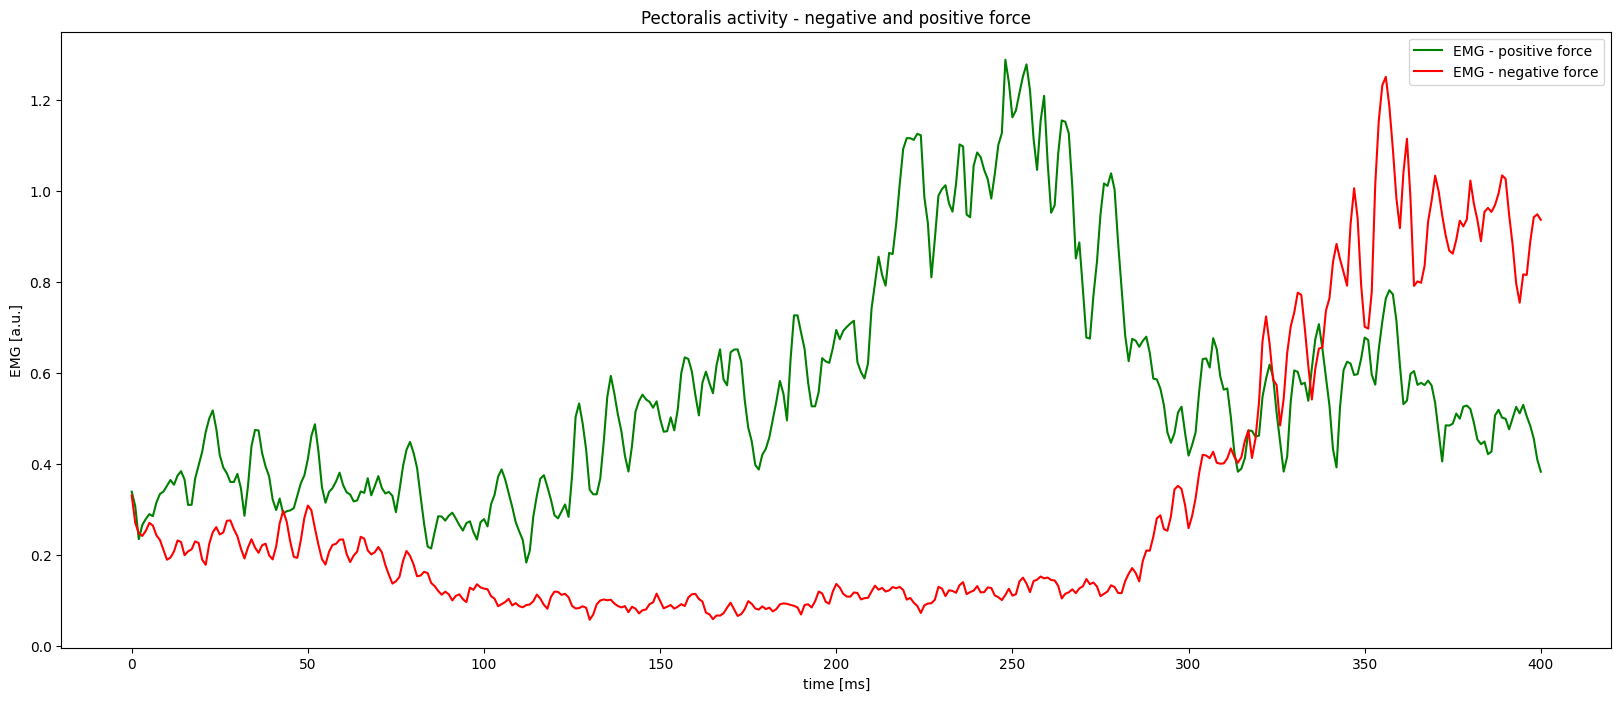

In [57]:
fig = plt.subplots(figsize=(20,8))
plt.title('Pectoralis activity - negative and positive force')
plt.plot(avg_pectoralis_pf, color='g', label='EMG - positive force')
plt.plot(avg_pectoralis_nf, color='r', label='EMG - negative force')
#plt.axvline((avg_rt_nf+avg_rt_pf)/2, color='k', alpha=0.5, label='reaction time')
plt.xlabel('time [ms]')
plt.ylabel('EMG [a.u.]')
plt.legend()



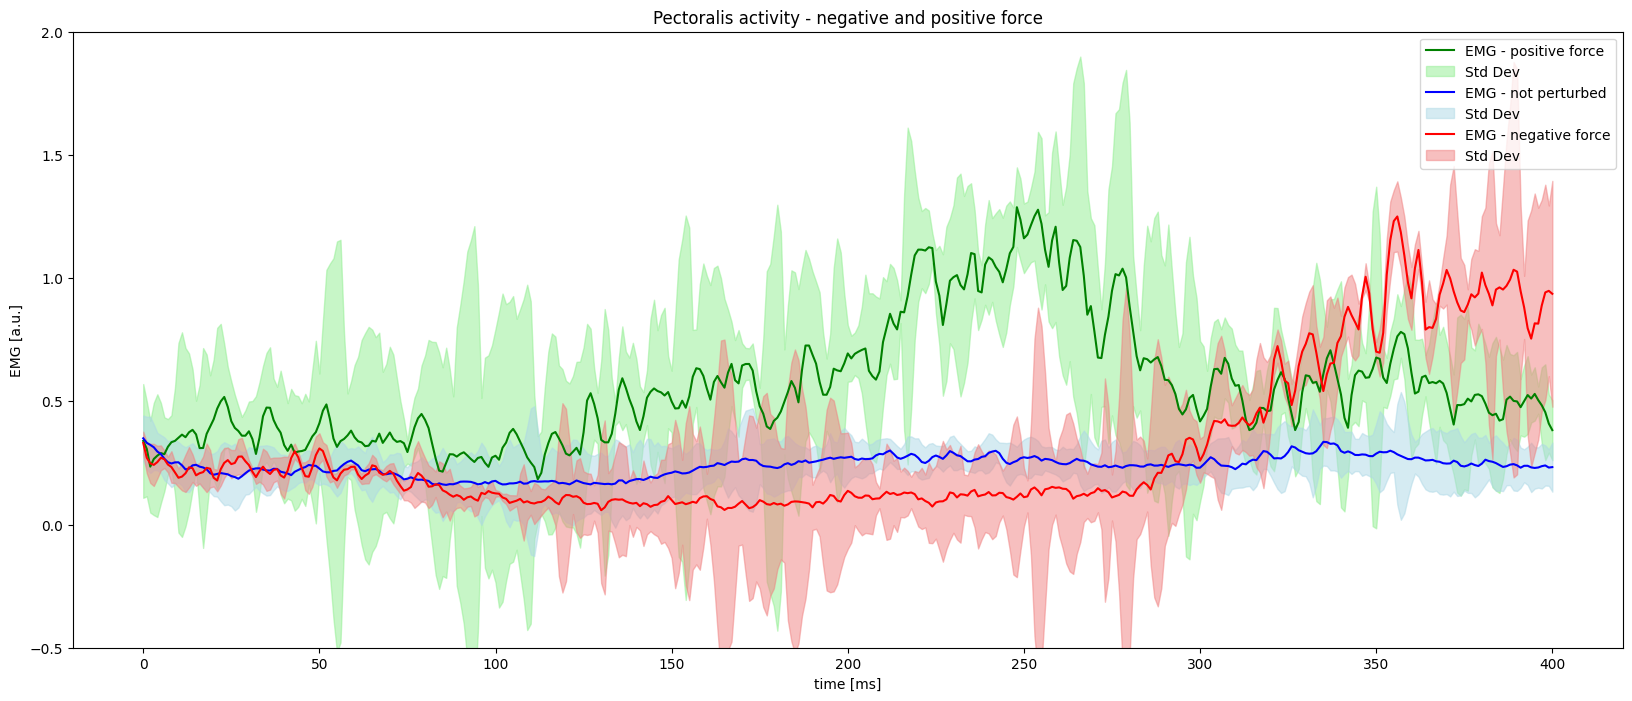

In [71]:
x_axis = np.arange(0, len(avg_pectoralis_nf))
fig = plt.subplots(figsize=(20,8))
plt.title('Pectoralis activity - negative and positive force')
plt.plot(avg_pectoralis_pf, color='g', label='EMG - positive force')
plt.fill_between(x_axis, avg_pectoralis_pf - std_pf/10, avg_pectoralis_pf + std_pf/10, color='lightgreen', alpha=0.5, label='Std Dev')
plt.plot(avg_pectoralis_np, color='b', label='EMG - not perturbed')
plt.fill_between(x_axis, avg_pectoralis_np - std_np/10, avg_pectoralis_np + std_np/10, color='lightblue', alpha=0.5, label='Std Dev')
plt.plot(avg_pectoralis_nf, color='r', label='EMG - negative force')
plt.fill_between(x_axis, avg_pectoralis_nf - std_nf/10, avg_pectoralis_nf + std_nf/10, color='lightcoral', alpha=0.5, label='Std Dev')
#plt.axvline((avg_rt_nf+avg_rt_pf)/2, color='k', alpha=0.5, label='reaction time')
plt.xlabel('time [ms]')
plt.ylabel('EMG [a.u.]')
plt.ylim([-0.5, 2])
plt.legend()


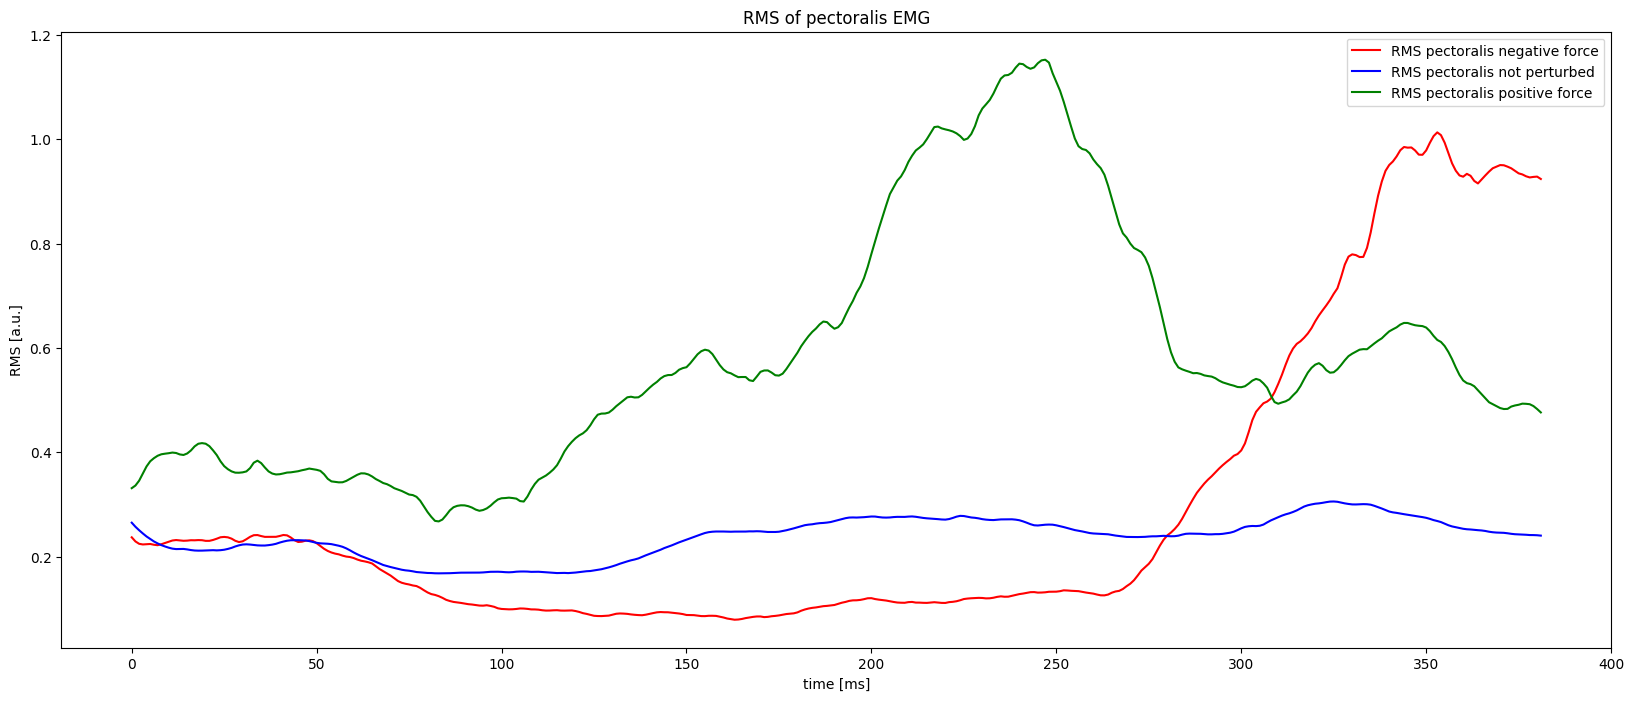

In [96]:
# Set the window size for smoothing (adjust as needed)
window_size = 20  
# Compute the RMS of the EMG signal
rms_pect_nf = calculate_rms(avg_pectoralis_nf,  window_size)
rms_pect_np = calculate_rms(avg_pectoralis_np, window_size)
rms_pect_pf = calculate_rms(avg_pectoralis_pf, window_size)

# Plot
time = np.arange(0, len(avg_pectoralis_nf)/200, 1/200)  # Assuming 200 Hz sampling rate
fig = plt.subplots(figsize=(20,8))
plt.plot(rms_pect_nf, color='r', label='RMS pectoralis negative force')
#plt.fill_between(x_axis, rms_delt_nf - std_nf, rms_delt_nf + std_nf, color='lightcoral', alpha=0.5, label='Std Dev')
plt.plot(rms_pect_np, color='b', label='RMS pectoralis not perturbed')
#plt.fill_between(x_axis, rms_delt_np - std_np, rms_delt_np + std_np, color='lightblue', alpha=0.5, label='Std Dev')
plt.plot(rms_pect_pf, color='g', label='RMS pectoralis positive force')
#plt.fill_between(x_axis, rms_delt_pf - std_pf, rms_delt_pf + std_pf, color='lightgreen', alpha=0.5, label='Std Dev')

plt.title('RMS of pectoralis EMG')
plt.xlabel('time [ms]')
plt.ylabel('RMS [a.u.]')
plt.legend()
plt.show()

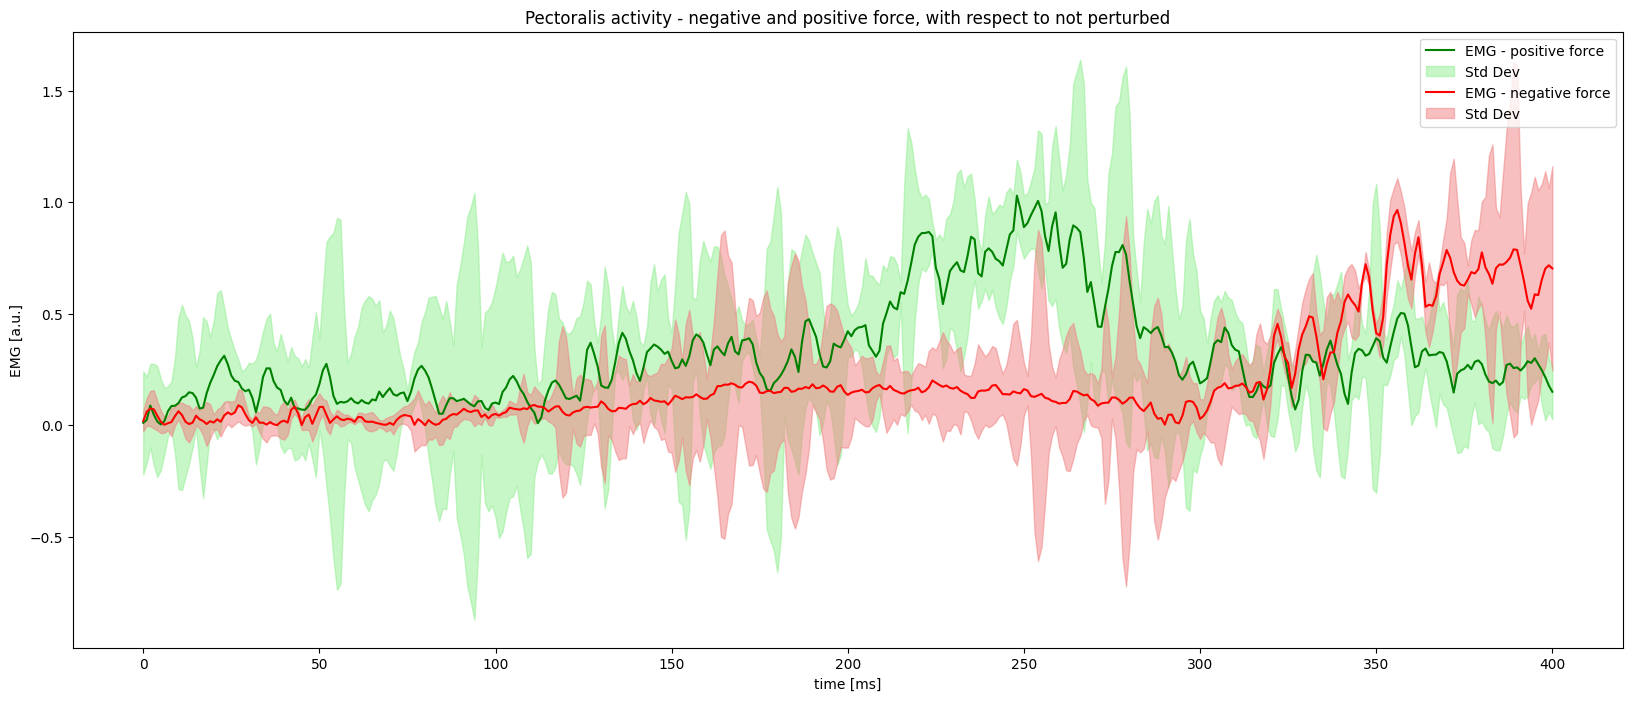

In [75]:
# Plot difference EMG - baseline
fig = plt.subplots(figsize=(20,8))
plt.title('Pectoralis activity - negative and positive force, with respect to not perturbed')
plt.plot(np.abs(avg_pectoralis_pf-avg_pectoralis_np), color='g', label='EMG - positive force')
plt.fill_between(x_axis, np.abs(avg_pectoralis_pf-avg_pectoralis_np) - std_pf/10, np.abs(avg_pectoralis_pf-avg_pectoralis_np) + std_pf/10, color='lightgreen', alpha=0.5, label='Std Dev')

#plt.plot(avg_pectoralis_np, color='b', label='EMG - not perturbed')
plt.plot(np.abs(avg_pectoralis_nf-avg_pectoralis_np), color='r', label='EMG - negative force')
plt.fill_between(x_axis, np.abs(avg_pectoralis_nf-avg_pectoralis_np) - std_nf/10, np.abs(avg_pectoralis_nf-avg_pectoralis_np) + std_nf/10, color='lightcoral', alpha=0.5, label='Std Dev')

#plt.axvline((avg_rt_nf+avg_rt_pf)/2, color='k', alpha=0.5, label='reaction time')
plt.xlabel('time [ms]')
plt.ylabel('EMG [a.u.]')
plt.legend()

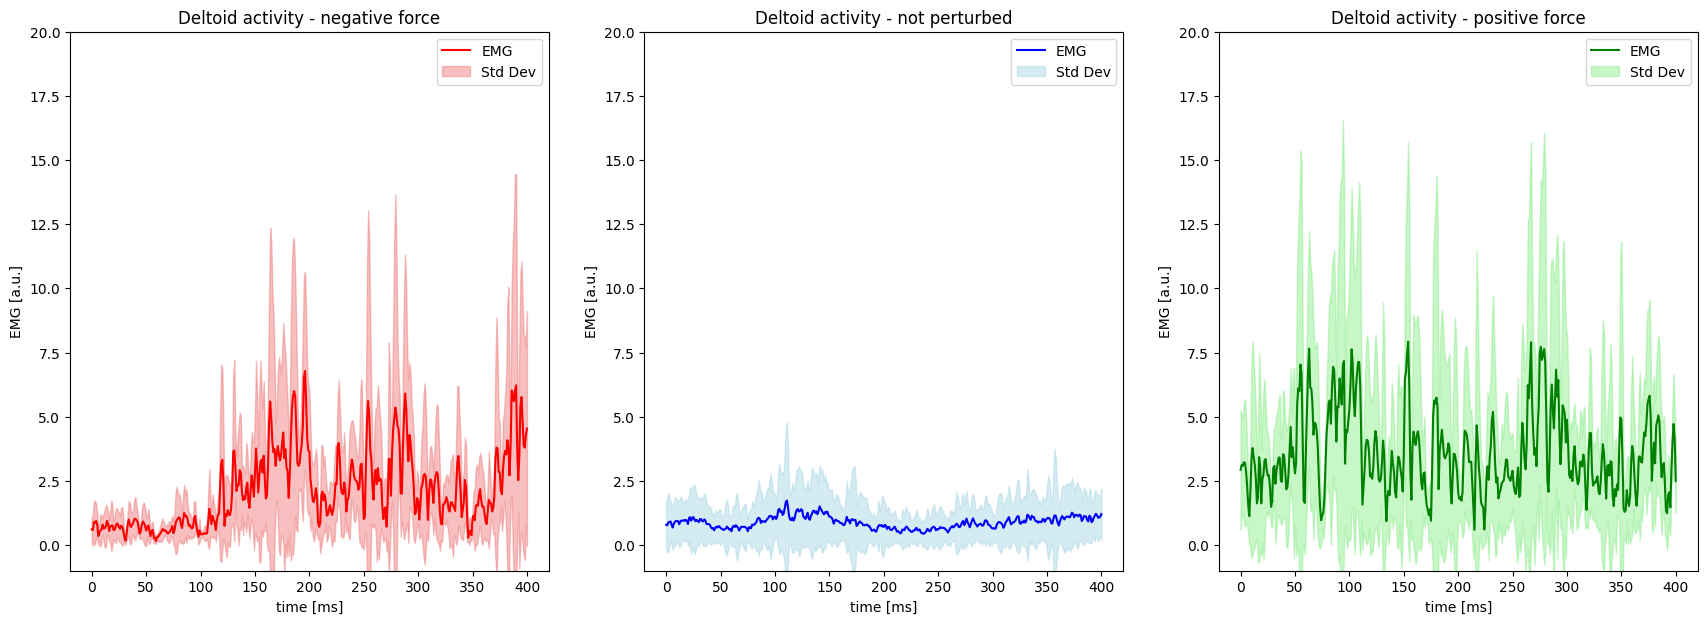

In [87]:
# Plot EMG with vert line for reaction time
extracted = dictMuscles['extracted']
deltoid = dictMuscles['Deltoid']

fig, axs = plt.subplots(1, 3, figsize=(21,7))

deltoid_np = []
deltoid_nf = []
deltoid_pf = []

rt_np = []
rt_nf = []
rt_pf = []

for i in range(0,60) :
    if extracted[i,2] == 1 : # not perturbed
        deltoid_np.append(deltoid[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   
        rt_np.append(extracted[i,-1]-active_segments_y[i,0])

    if extracted[i,2] == 2 : # negative force
        deltoid_nf.append(deltoid[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   
        rt_nf.append(extracted[i,-1]-active_segments_y[i,0])
        
    if extracted[i,2] == 3 : # positive force
        deltoid_pf.append(deltoid[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   
        rt_pf.append(extracted[i,-1]-active_segments_y[i,0])

# Compute the mean
avg_deltoid_np = np.mean(deltoid_np, axis=0)
avg_deltoid_nf = np.mean(deltoid_nf, axis=0)
avg_deltoid_pf = np.mean(deltoid_pf, axis=0)

std_np = np.std(deltoid_np, axis=0)
std_nf = np.std(deltoid_nf, axis=0)
std_pf = np.std(deltoid_pf, axis=0)

avg_rt_np = np.mean(rt_np, axis=0)
avg_rt_nf = np.mean(rt_nf, axis=0)
avg_rt_pf = np.mean(rt_pf, axis=0)

x_axis = np.arange(0,len(avg_pectoralis_nf))

axs[0].plot(avg_deltoid_nf, color='r', label='EMG')
axs[0].fill_between(x_axis, avg_deltoid_nf - std_nf, avg_deltoid_nf + std_nf, color='lightcoral', alpha=0.5, label='Std Dev')
#axs[0].axvline(avg_rt_nf, color='k', label='reaction time')
axs[0].set_xlabel('time [ms]')
axs[0].set_ylabel('EMG [a.u.]')
axs[0].set_title('Deltoid activity - negative force')
axs[0].set_ylim([-1,20])
#axs[0].set_xlim([200,600])
axs[0].legend()

axs[1].plot(avg_deltoid_np, color='b', label='EMG')
axs[1].fill_between(x_axis, avg_deltoid_np - std_np, avg_deltoid_np + std_np, color='lightblue', alpha=0.5, label='Std Dev')
#axs[1].axvline(avg_rt_np, color='k', label='reaction time')
axs[1].set_xlabel('time [ms]')
axs[1].set_ylabel('EMG [a.u.]')
axs[1].set_title('Deltoid activity - not perturbed')
axs[1].set_ylim([-1,20])
axs[1].legend()

axs[2].plot(avg_deltoid_pf, color='g', label='EMG')
axs[2].fill_between(x_axis, avg_deltoid_pf - std_pf, avg_deltoid_pf + std_pf, color='lightgreen', alpha=0.5, label='Std Dev')
#axs[2].axvline(avg_rt_pf, color='k', label='reaction time')
axs[2].set_xlabel('time [ms]')
axs[2].set_ylabel('EMG [a.u.]')
axs[2].set_title('Deltoid activity - positive force')
axs[2].set_ylim([-1,20])
axs[2].legend()

plt.show()

max_deltoid_nf = np.max(avg_deltoid_nf)
max_deltoid_np = np.max(avg_deltoid_np)
max_deltoid_pf = np.max(avg_deltoid_pf)


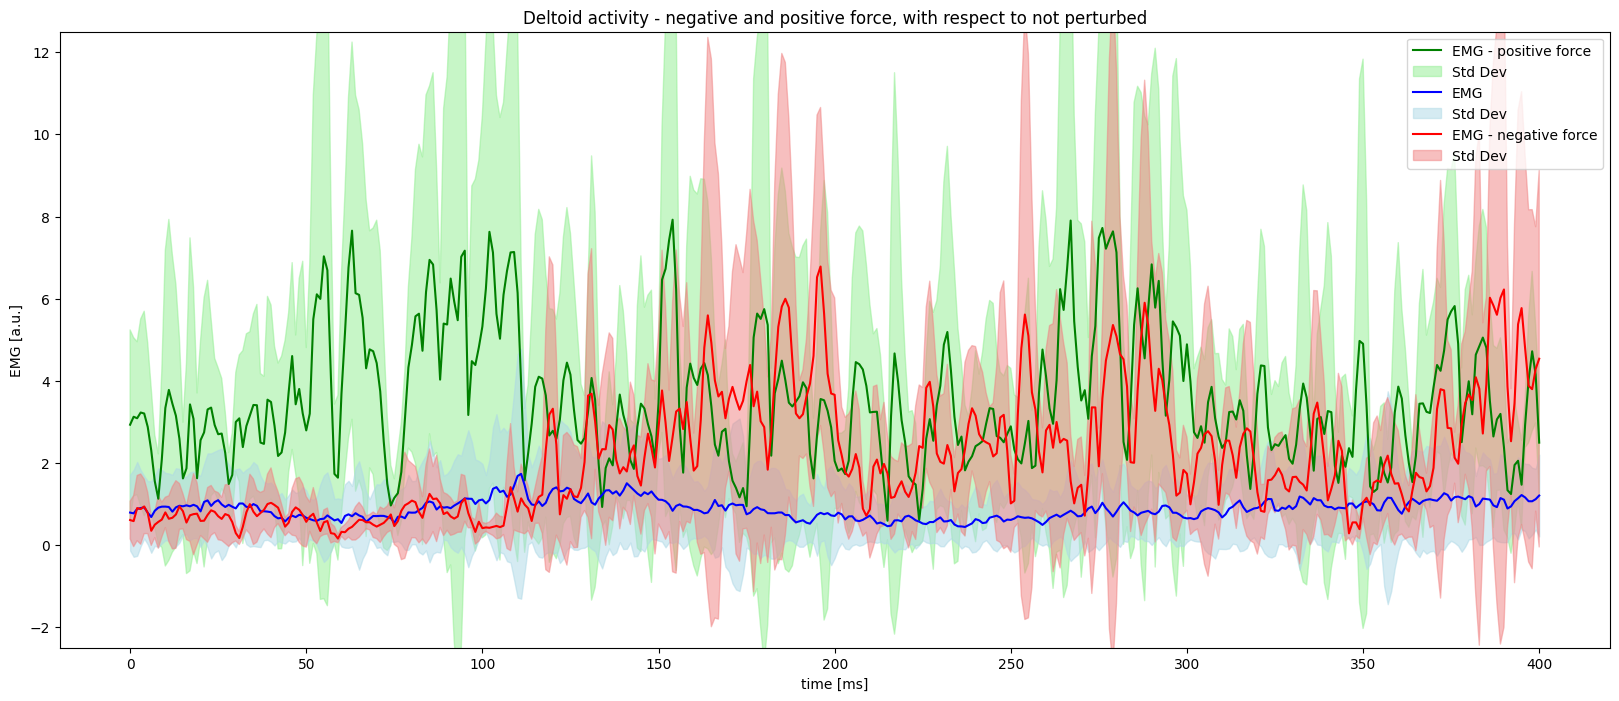

In [88]:
fig = plt.subplots(figsize=(20,8))
plt.title('Deltoid activity - negative and positive force, with respect to not perturbed')
plt.plot(avg_deltoid_pf, color='g', label='EMG - positive force')
plt.fill_between(x_axis, avg_deltoid_pf - std_pf, avg_deltoid_pf + std_pf, color='lightgreen', alpha=0.5, label='Std Dev')
plt.plot(avg_deltoid_np, color='b', label='EMG')
plt.fill_between(x_axis, avg_deltoid_np - std_np, avg_deltoid_np + std_np, color='lightblue', alpha=0.5, label='Std Dev')
plt.plot(avg_deltoid_nf, color='r', label='EMG - negative force')
plt.fill_between(x_axis, avg_deltoid_nf - std_nf, avg_deltoid_nf + std_nf, color='lightcoral', alpha=0.5, label='Std Dev')

#plt.axvline((avg_rt_nf+avg_rt_pf)/2, color='k', label='reaction time')
#plt.xlim(200,700)
plt.ylim([-2.5, 12.5])
plt.xlabel('time [ms]')
plt.ylabel('EMG [a.u.]')
plt.legend()


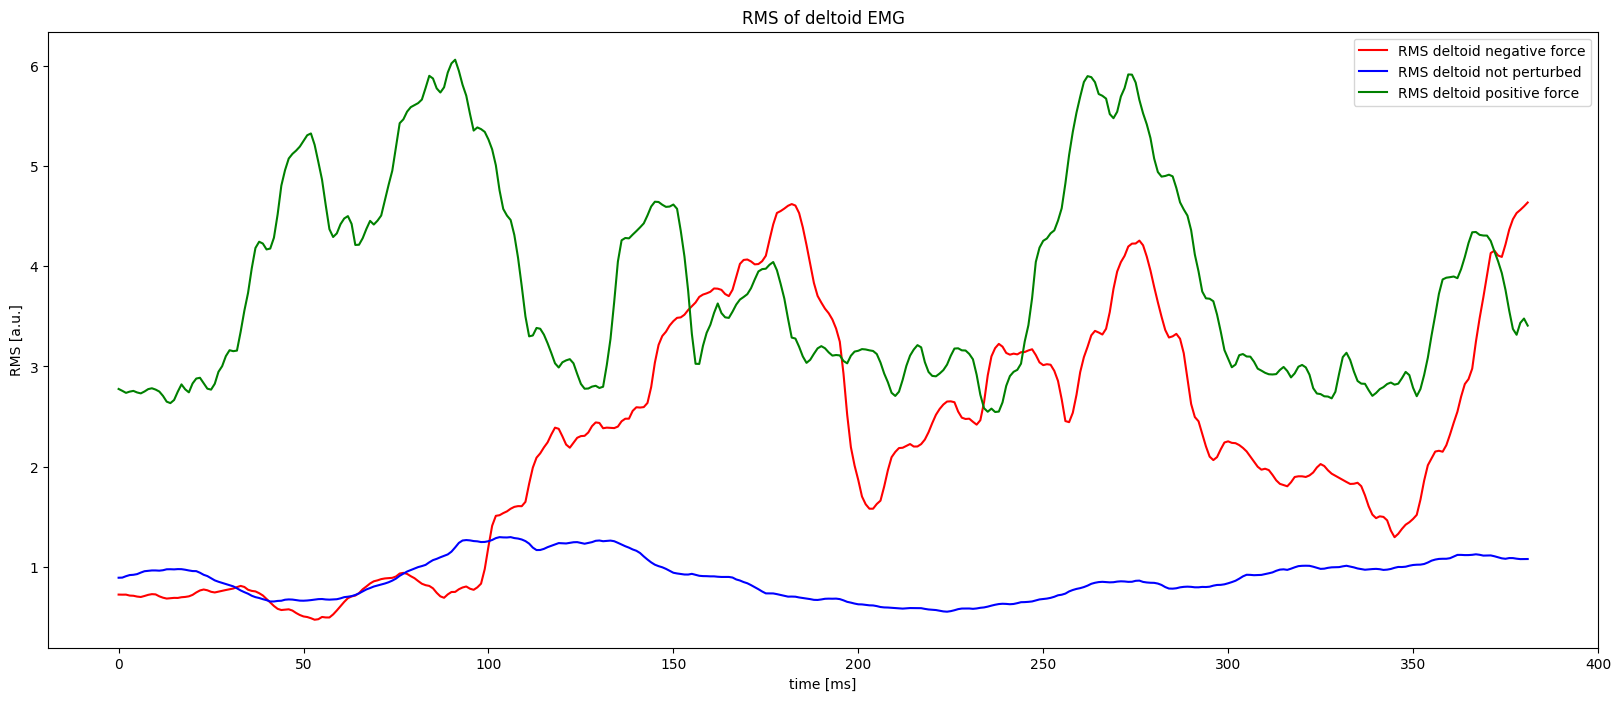

In [95]:
# Set the window size for smoothing (adjust as needed)
window_size = 20  
# Compute the RMS of the EMG signal
rms_delt_nf = calculate_rms(avg_deltoid_nf, window_size)
rms_delt_np = calculate_rms(avg_deltoid_np, window_size)
rms_delt_pf = calculate_rms(avg_deltoid_pf, window_size)

# Plot
time = np.arange(0, len(avg_deltoid_nf)/200, 1/200)  # Assuming 200 Hz sampling rate
fig = plt.subplots(figsize=(20,8))
plt.plot(rms_delt_nf, color='r', label='RMS deltoid negative force')
#plt.fill_between(x_axis, rms_delt_nf - std_nf, rms_delt_nf + std_nf, color='lightcoral', alpha=0.5, label='Std Dev')
plt.plot(rms_delt_np, color='b', label='RMS deltoid not perturbed')
#plt.fill_between(x_axis, rms_delt_np - std_np, rms_delt_np + std_np, color='lightblue', alpha=0.5, label='Std Dev')
plt.plot(rms_delt_pf, color='g', label='RMS deltoid positive force')
#plt.fill_between(x_axis, rms_delt_pf - std_pf, rms_delt_pf + std_pf, color='lightgreen', alpha=0.5, label='Std Dev')

plt.title('RMS of deltoid EMG')
plt.xlabel('time [ms]')
plt.ylabel('RMS [a.u.]')
plt.legend()
plt.show()


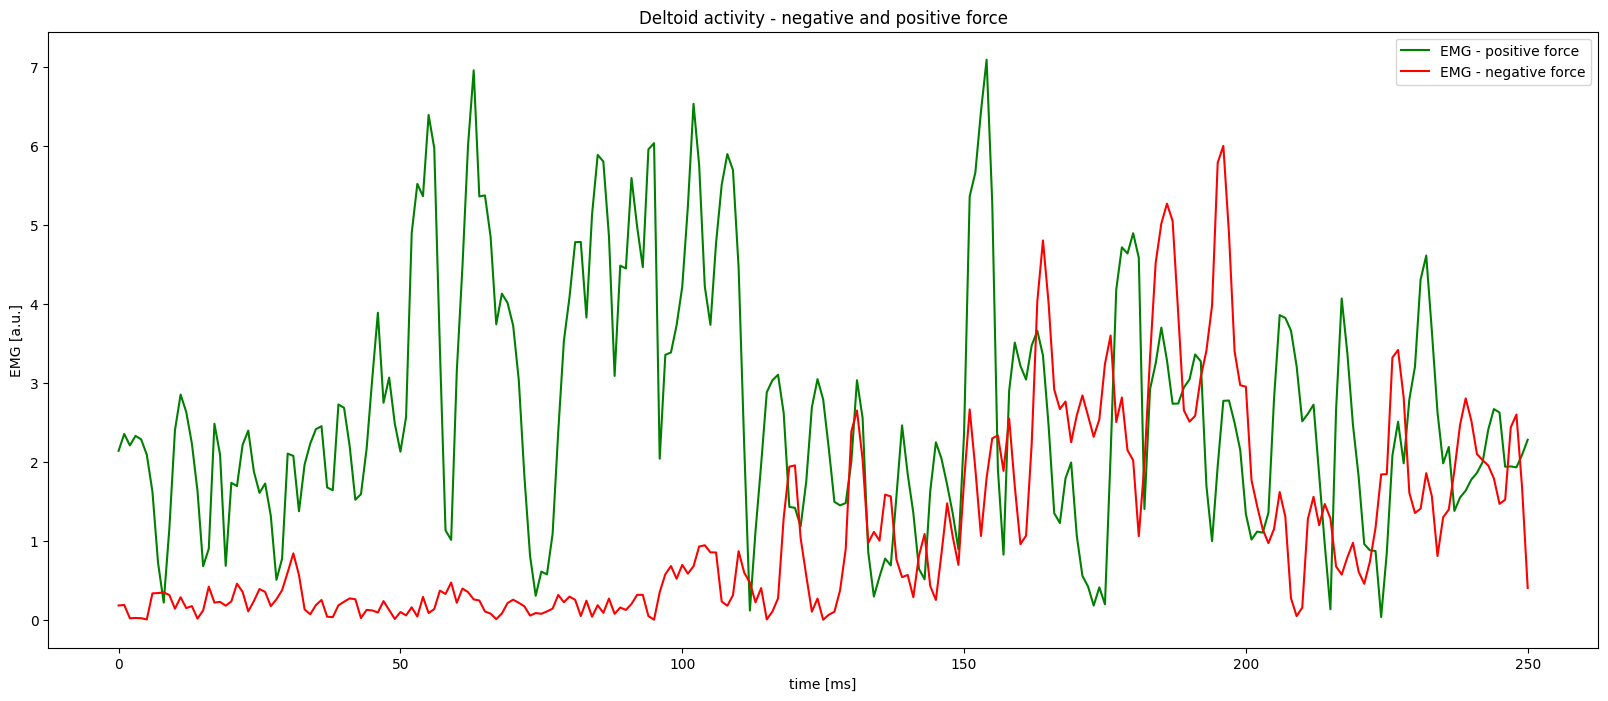

In [36]:
# Plot difference EMG - baseline
fig = plt.subplots(figsize=(20,8))
plt.title('Deltoid activity - negative and positive force')
plt.plot(np.abs(avg_deltoid_pf-avg_deltoid_np), color='g', label='EMG - positive force')
#plt.plot(avg_pectoralis_np, color='b', label='EMG - not perturbed')
plt.plot(np.abs(avg_deltoid_nf-avg_deltoid_np), color='r', label='EMG - negative force')
#plt.axvline((avg_rt_nf+avg_rt_pf)/2, color='k', alpha=0.5, label='reaction time')
plt.xlabel('time [ms]')
plt.ylabel('EMG [a.u.]')
plt.legend()

232
232
251


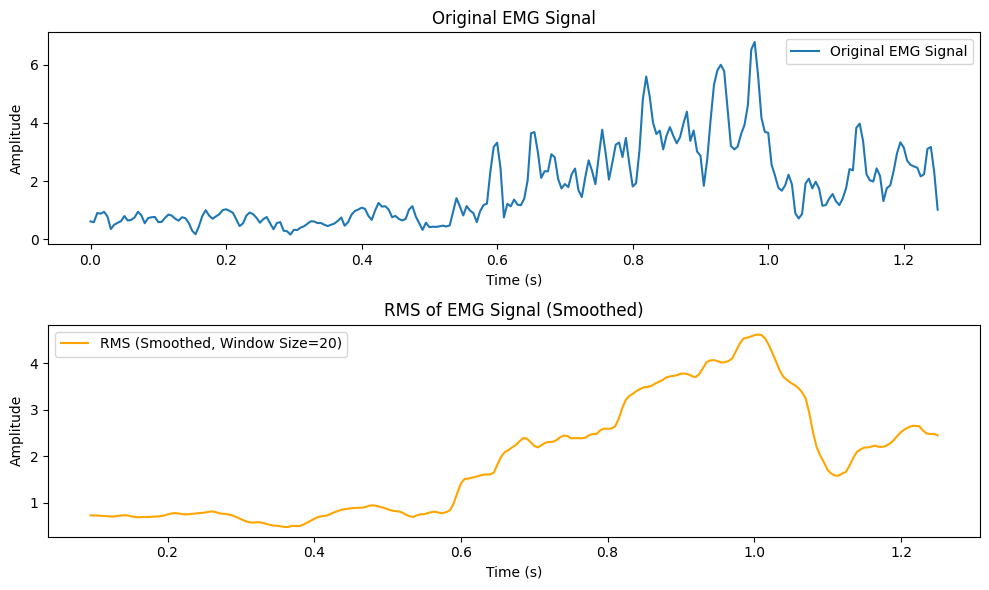

In [42]:
# Define a function to compute the RMS along a specified window size
def calculate_rms(signal, window_size):
    squared_signal = signal**2
    rms_values = np.sqrt(np.convolve(squared_signal, np.ones(window_size)/window_size, mode='valid'))
    return rms_values

# Set the window size for smoothing (adjust as needed)
window_size = 20  # You can experiment with different values

# Compute the RMS of the EMG signal
rms_values = calculate_rms(avg_deltoid_nf, window_size)

# Plot the original EMG signal and the RMS-smoothed version
time = np.arange(0, len(avg_deltoid_nf)/200, 1/200)  # Assuming 200 Hz sampling rate

print(len(time[window_size-1:]))
print(len(rms_values))
print(len(avg_deltoid_nf))

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, avg_deltoid_nf, label='Original EMG Signal')
plt.title('Original EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time[window_size-1:], rms_values, label=f'RMS (Smoothed, Window Size={window_size})', color='orange')
plt.title('RMS of EMG Signal (Smoothed)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

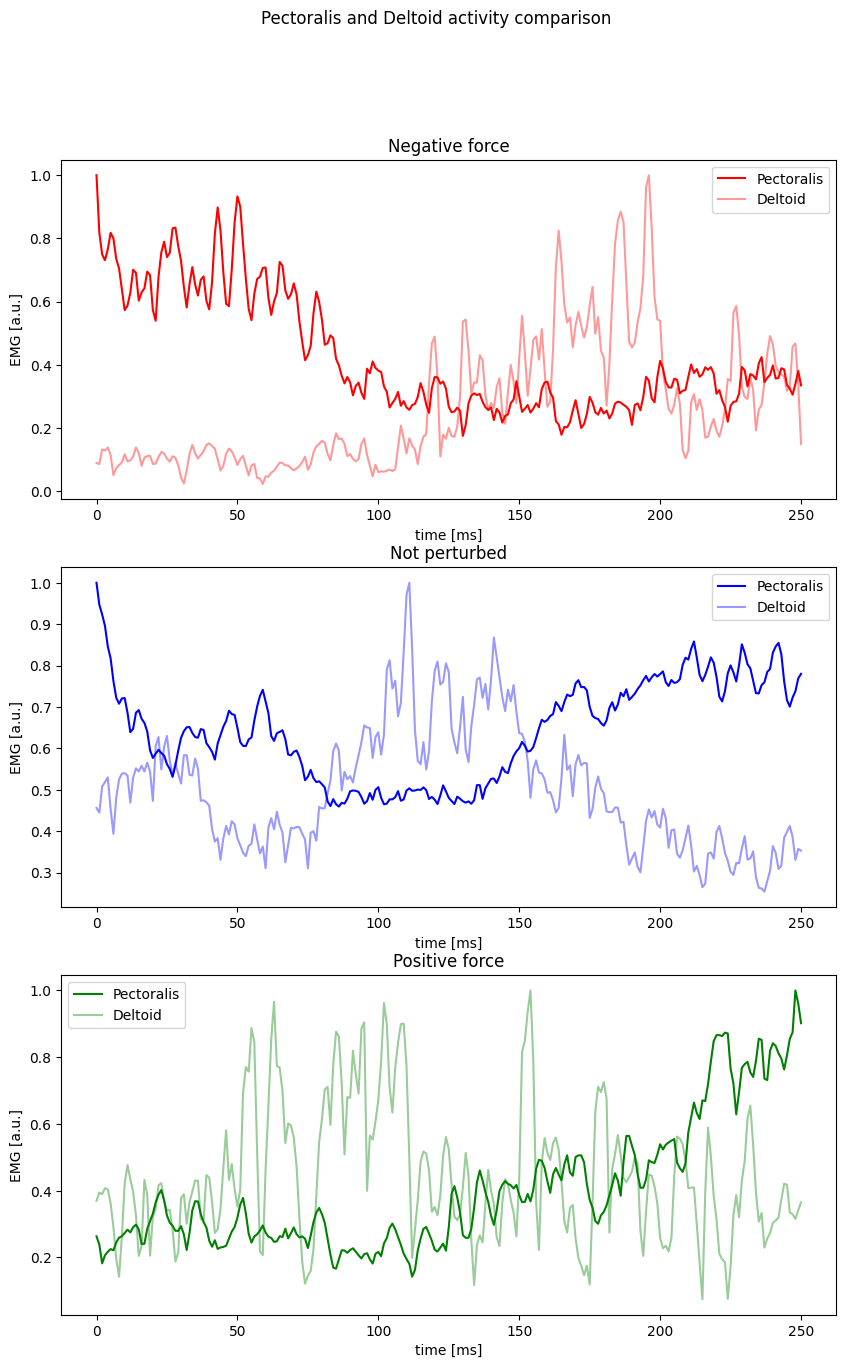

In [29]:
# Comparison Pectoralis and Deltoid activity
fig, axs = plt.subplots(3, 1, figsize=(10,15))
fig.suptitle('Pectoralis and Deltoid activity comparison')

axs[0].set_title('Negative force')
axs[0].plot(avg_pectoralis_nf/max_pectoralis_nf, color='r', label='Pectoralis')
axs[0].plot(avg_deltoid_nf/max_deltoid_nf, color='r', alpha=0.4, label='Deltoid')
axs[0].set_xlabel('time [ms]')
axs[0].set_ylabel('EMG [a.u.]')
axs[0].legend()

axs[1].set_title('Not perturbed')
axs[1].plot(avg_pectoralis_np/max_pectoralis_np, color='b', label='Pectoralis')
axs[1].plot(avg_deltoid_np/max_deltoid_np, color='b', alpha=0.4, label='Deltoid')
axs[1].set_xlabel('time [ms]')
axs[1].set_ylabel('EMG [a.u.]')
axs[1].legend()

axs[2].set_title('Positive force')
axs[2].plot(avg_pectoralis_pf/max_pecotralis_pf, color='g', label='Pectoralis')
axs[2].plot(avg_deltoid_pf/max_deltoid_pf, color='g', alpha=0.4, label='Deltoid')
axs[2].set_xlabel('time [ms]')
axs[2].set_ylabel('EMG [a.u.]')
axs[2].legend()


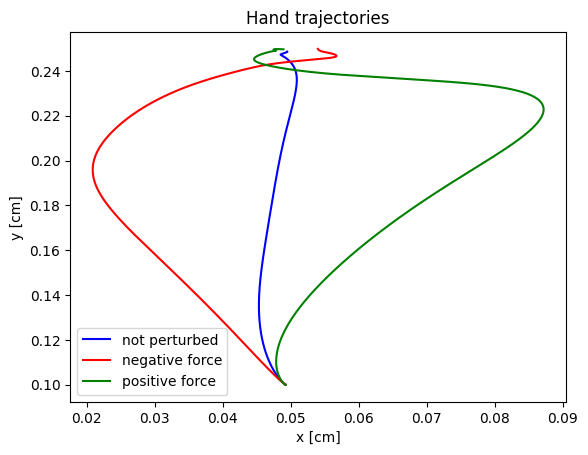

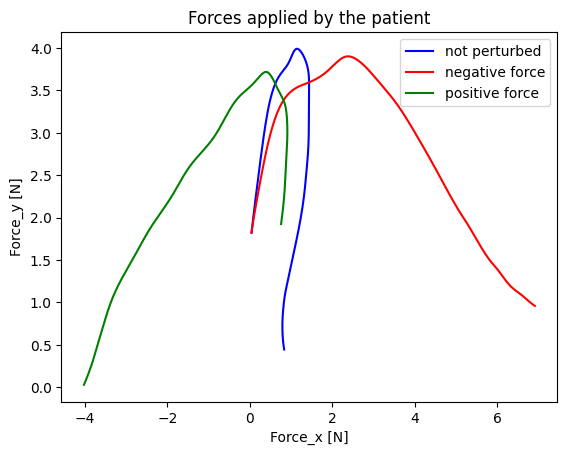

In [30]:
# Plot x and y coordinates from the dictMuscles with the forces applied by the patient:
x = dictMuscles['HandX']
y = dictMuscles['HandY']

force_x = dictMuscles['HandXForce']
force_y = dictMuscles['HandYForce']

descriptions = dictMuscles['descriptions']
extracted = dictMuscles['extracted']

mean_x_np = []
mean_y_np = []
mean_x_nf = []
mean_y_nf = []
mean_x_pf = []
mean_y_pf = []
mean_fx_np = []
mean_fy_np = []
mean_fx_nf = []
mean_fy_nf = []
mean_fx_pf = []
mean_fy_pf = []

for i in range(0,len(x)) :
    if dictMuscles['extracted'][i,2] == 1 :
        mean_x_np.append(x[i,:])
        mean_y_np.append(y[i,:])
        mean_fx_np.append(force_x[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])
        mean_fy_np.append(force_y[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])
    if dictMuscles['extracted'][i,2] == 2 :
        mean_x_nf.append(x[i,:])
        mean_y_nf.append(y[i,:])
        mean_fx_nf.append(force_x[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])
        mean_fy_nf.append(force_y[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])
    if dictMuscles['extracted'][i,2] == 3 :
        mean_x_pf.append(x[i,:])
        mean_y_pf.append(y[i,:])
        mean_fx_pf.append(force_x[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])
        mean_fy_pf.append(force_y[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])

# Compute the means
mean_x_np = np.mean(mean_x_np, axis=0)
mean_y_np = np.mean(mean_y_np, axis=0)
mean_x_nf = np.mean(mean_x_nf, axis=0)
mean_y_nf = np.mean(mean_y_nf, axis=0)
mean_x_pf = np.mean(mean_x_pf, axis=0)
mean_y_pf = np.mean(mean_y_pf, axis=0)
mean_fx_np = np.mean(mean_fx_np, axis=0)
mean_fy_np = np.mean(mean_fy_np, axis=0)
mean_fx_nf = np.mean(mean_fx_nf, axis=0)
mean_fy_nf = np.mean(mean_fy_nf, axis=0)
mean_fx_pf = np.mean(mean_fx_pf, axis=0)
mean_fy_pf = np.mean(mean_fy_pf, axis=0)

fig, axs = plt.subplots()
plt.plot(mean_x_np, mean_y_np, color='b', label='not perturbed')
plt.plot(mean_x_nf, mean_y_nf, color='r', label='negative force')
plt.plot(mean_x_pf, mean_y_pf, color='g', label='positive force')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Hand trajectories')
plt.legend()

fig, axs = plt.subplots()
plt.plot(mean_fx_np, mean_fy_np, color='b', label='not perturbed')
plt.plot(mean_fx_nf, mean_fy_nf, color='r', label='negative force')
plt.plot(mean_fx_pf, mean_fy_pf, color='g', label='positive force')
plt.xlabel('Force_x [N]')
plt.ylabel('Force_y [N]')
plt.title('Forces applied by the patient')
plt.legend()

plt.show()

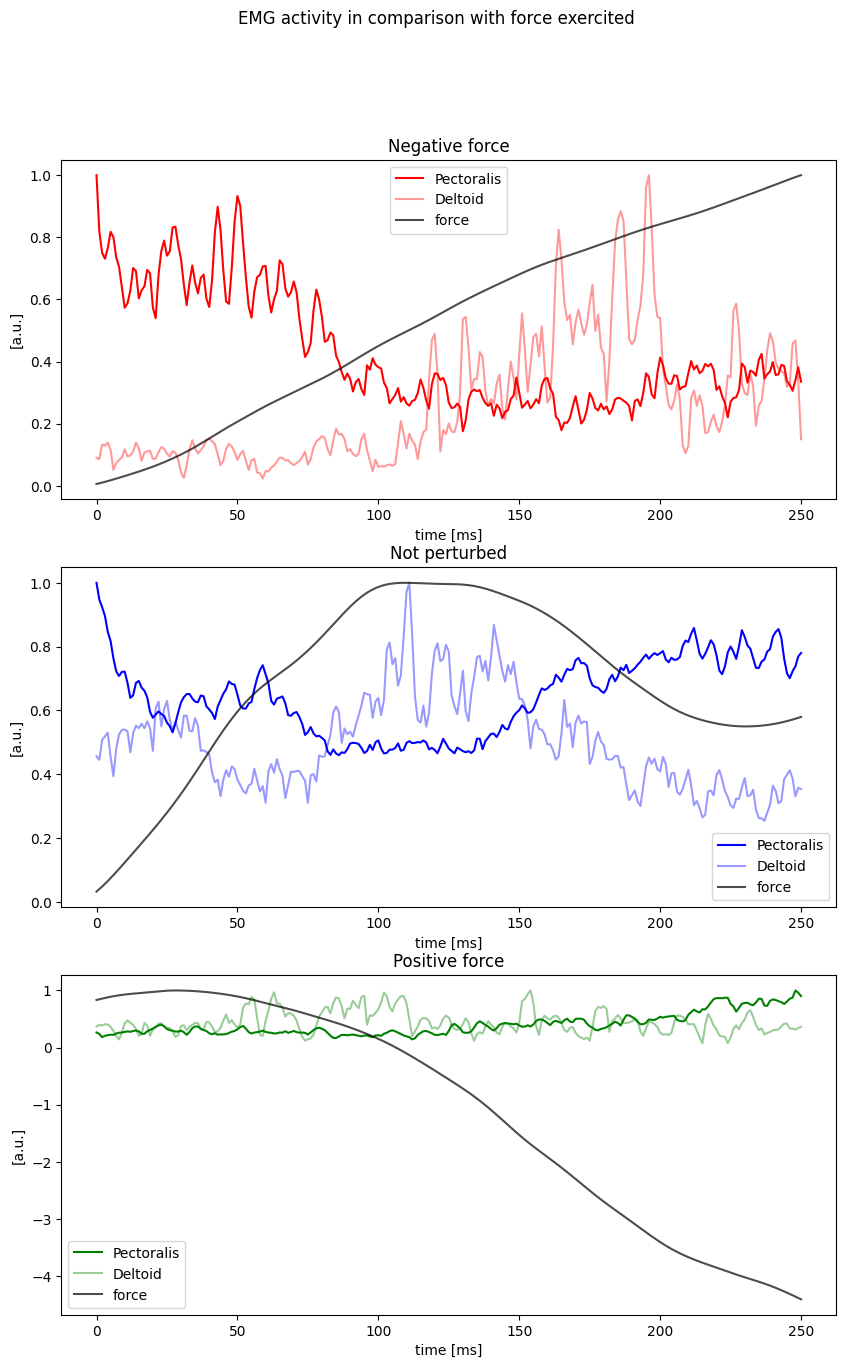

In [31]:
# FX MAKES SENSE (MORE OR LESS)
# Comparison Pectoralis and Deltoid activity with the force applied by the patient
fig, axs = plt.subplots(3, 1, figsize=(10,15))
fig.suptitle('EMG activity in comparison with force exercited')

axs[0].set_title('Negative force')
axs[0].plot(avg_pectoralis_nf/max_pectoralis_nf, color='r', label='Pectoralis')
axs[0].plot(avg_deltoid_nf/max_deltoid_nf, color='r', alpha=0.4, label='Deltoid')
axs[0].plot(mean_fx_nf/np.max(mean_fx_nf), color='k', alpha=0.7, label='force')
axs[0].set_xlabel('time [ms]')
axs[0].set_ylabel('[a.u.]')
axs[0].legend()

axs[1].set_title('Not perturbed')
axs[1].plot(avg_pectoralis_np/max_pectoralis_np, color='b', label='Pectoralis')
axs[1].plot(avg_deltoid_np/max_deltoid_np, color='b', alpha=0.4, label='Deltoid')
axs[1].plot(mean_fx_np/np.max(mean_fx_np), color='k', alpha=0.7, label='force')
axs[1].set_xlabel('time [ms]')
axs[1].set_ylabel('[a.u.]')
axs[1].legend()

axs[2].set_title('Positive force')
axs[2].plot(avg_pectoralis_pf/max_pecotralis_pf, color='g', label='Pectoralis')
axs[2].plot(avg_deltoid_pf/max_deltoid_pf, color='g', alpha=0.4, label='Deltoid')
axs[2].plot(mean_fx_pf/np.max(mean_fx_pf), color='k', alpha=0.7, label='force')
axs[2].set_xlabel('time [ms]')
axs[2].set_ylabel('[a.u.]')
axs[2].legend()

plt.show()

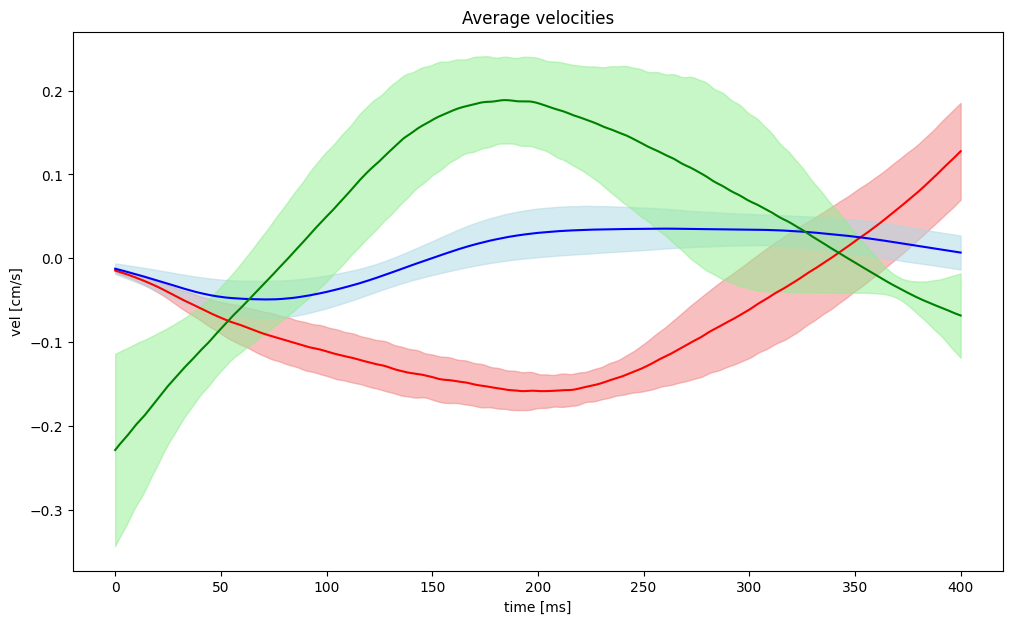

In [101]:
# Plot x velocities
# Plot EMG with vert line for reaction time
extracted = dictMuscles['extracted']
x_vel = dictMuscles['HandXVel']

fig, axs = plt.subplots(figsize=(12,7))

x_vel_np = []
x_vel_nf = []
x_vel_pf = []

for i in range(0,60) :
    if extracted[i,2] == 1 : # not perturbed
        x_vel_np.append(x_vel[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   

    if extracted[i,2] == 2 : # negative force
        x_vel_nf.append(x_vel[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   
        
    if extracted[i,2] == 3 : # positive force
        x_vel_pf.append(x_vel[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   

# Compute the mean
avg_x_vel_np = np.mean(x_vel_np, axis=0)
avg_x_vel_nf = np.mean(x_vel_nf, axis=0)
avg_x_vel_pf = np.mean(x_vel_pf, axis=0)

std_np = np.std(x_vel_np, axis=0)
std_nf = np.std(x_vel_nf, axis=0)
std_pf = np.std(x_vel_pf, axis=0)

x_axis = np.arange(0,len(avg_x_vel_nf))

plt.plot(avg_x_vel_nf, color='r', label='v_x - negative force')
plt.fill_between(x_axis, avg_x_vel_nf - std_nf, avg_x_vel_nf + std_nf, color='lightcoral', alpha=0.5, label='Std Dev')
plt.plot(avg_x_vel_np, color='b', label='v_x - not perturbed')
plt.fill_between(x_axis, avg_x_vel_np - std_np, avg_x_vel_np + std_np, color='lightblue', alpha=0.5, label='Std Dev')
plt.plot(avg_x_vel_pf, color='g', label='v_x - positive force')
plt.fill_between(x_axis, avg_x_vel_pf - std_pf, avg_x_vel_pf + std_pf, color='lightgreen', alpha=0.5, label='Std Dev')

plt.title('Average velocities')
plt.xlabel('time [ms]')
plt.ylabel('vel [cm/s]')





plt.show()




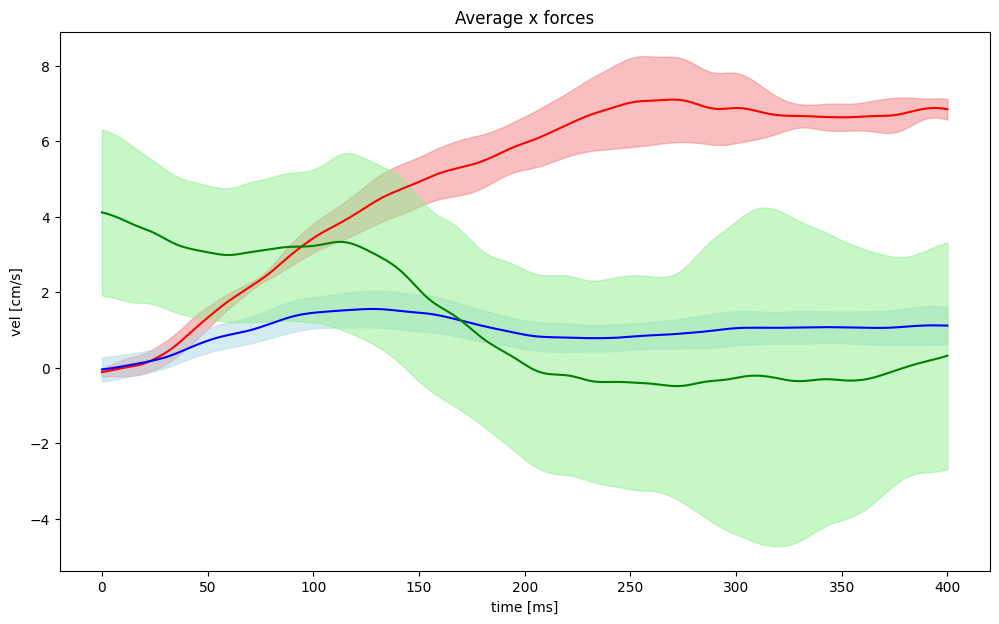

In [99]:
# Plot x velocities
# Plot EMG with vert line for reaction time
extracted = dictMuscles['extracted']
x_force = dictMuscles['HandXForce']

fig, axs = plt.subplots(figsize=(12,7))

x_force_np = []
x_force_nf = []
x_force_pf = []

for i in range(0,60) :
    if extracted[i,2] == 1 : # not perturbed
        x_force_np.append(x_force[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   

    if extracted[i,2] == 2 : # negative force
        x_force_nf.append(x_force[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   
        
    if extracted[i,2] == 3 : # positive force
        x_force_pf.append(x_force[i,int(active_segments_y[i,0]):int(active_segments_y[i,0]+min_len)])   

# Compute the mean
avg_x_force_np = np.mean(x_force_np, axis=0)
avg_x_force_nf = np.mean(x_force_nf, axis=0)
avg_x_force_pf = np.mean(x_force_pf, axis=0)

std_np = np.std(x_force_np, axis=0)
std_nf = np.std(x_force_nf, axis=0)
std_pf = np.std(x_force_pf, axis=0)

x_axis = np.arange(0,len(avg_x_force_nf))

plt.plot(avg_x_force_nf, color='r', label='F_x - negative force')
plt.fill_between(x_axis, avg_x_force_nf - std_nf, avg_x_force_nf + std_nf, color='lightcoral', alpha=0.5, label='Std Dev')
plt.plot(avg_x_force_np, color='b', label='F_x - not perturbed')
plt.fill_between(x_axis, avg_x_force_np - std_np, avg_x_force_np + std_np, color='lightblue', alpha=0.5, label='Std Dev')
plt.plot(avg_x_force_pf, color='g', label='F_x - positive force')
plt.fill_between(x_axis, avg_x_force_pf - std_pf, avg_x_force_pf + std_pf, color='lightgreen', alpha=0.5, label='Std Dev')

plt.title('Average x forces')
plt.xlabel('time [ms]')
plt.ylabel('vel [cm/s]')





plt.show()
